In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('data/rETH_market_price.csv')
df.head()

Unnamed: 0  reth_fair_value  reth_market_price  reth_premium  \
0           0         1.067560           1.067438      0.999886   
1           1         1.067560           1.067438      0.999886   
2           2         1.067560           1.067438      0.999886   
3           3         1.067435           1.067438      1.000003   
4           4         1.067435           1.067438      1.000003   

                   time  
0  2023-04-25T17:40:47Z  
1  2023-04-25T17:20:35Z  
2  2023-04-25T17:19:11Z  
3  2023-04-25T15:54:47Z  
4  2023-04-25T15:50:35Z

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe

format_k = lambda x, pos: f'{x/10**3:,.0f}K'

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

Text(0.5, 1.0, 'rETH premium')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: TheSans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: TheSans


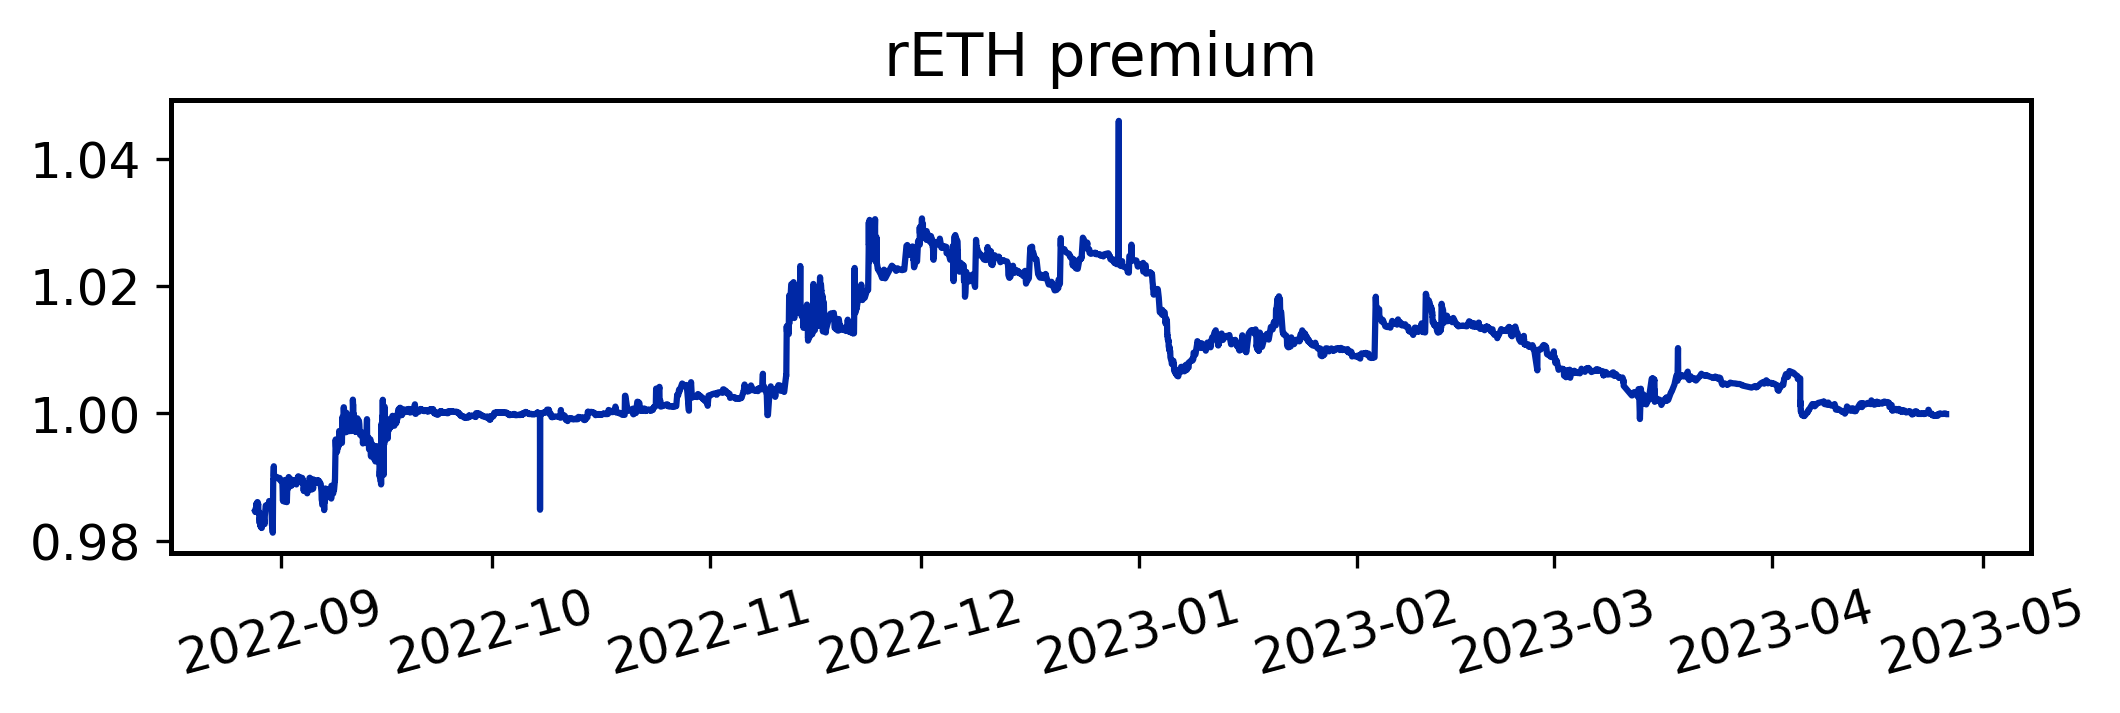

In [3]:
import matplotlib.pyplot as plt
df['time']=pd.to_datetime(df['time'])
df=df.set_index('time')
fig = plt.figure(figsize=(8, 2))
plt.plot(df['reth_premium'])
plt.xticks(rotation=15)
plt.title('rETH premium')


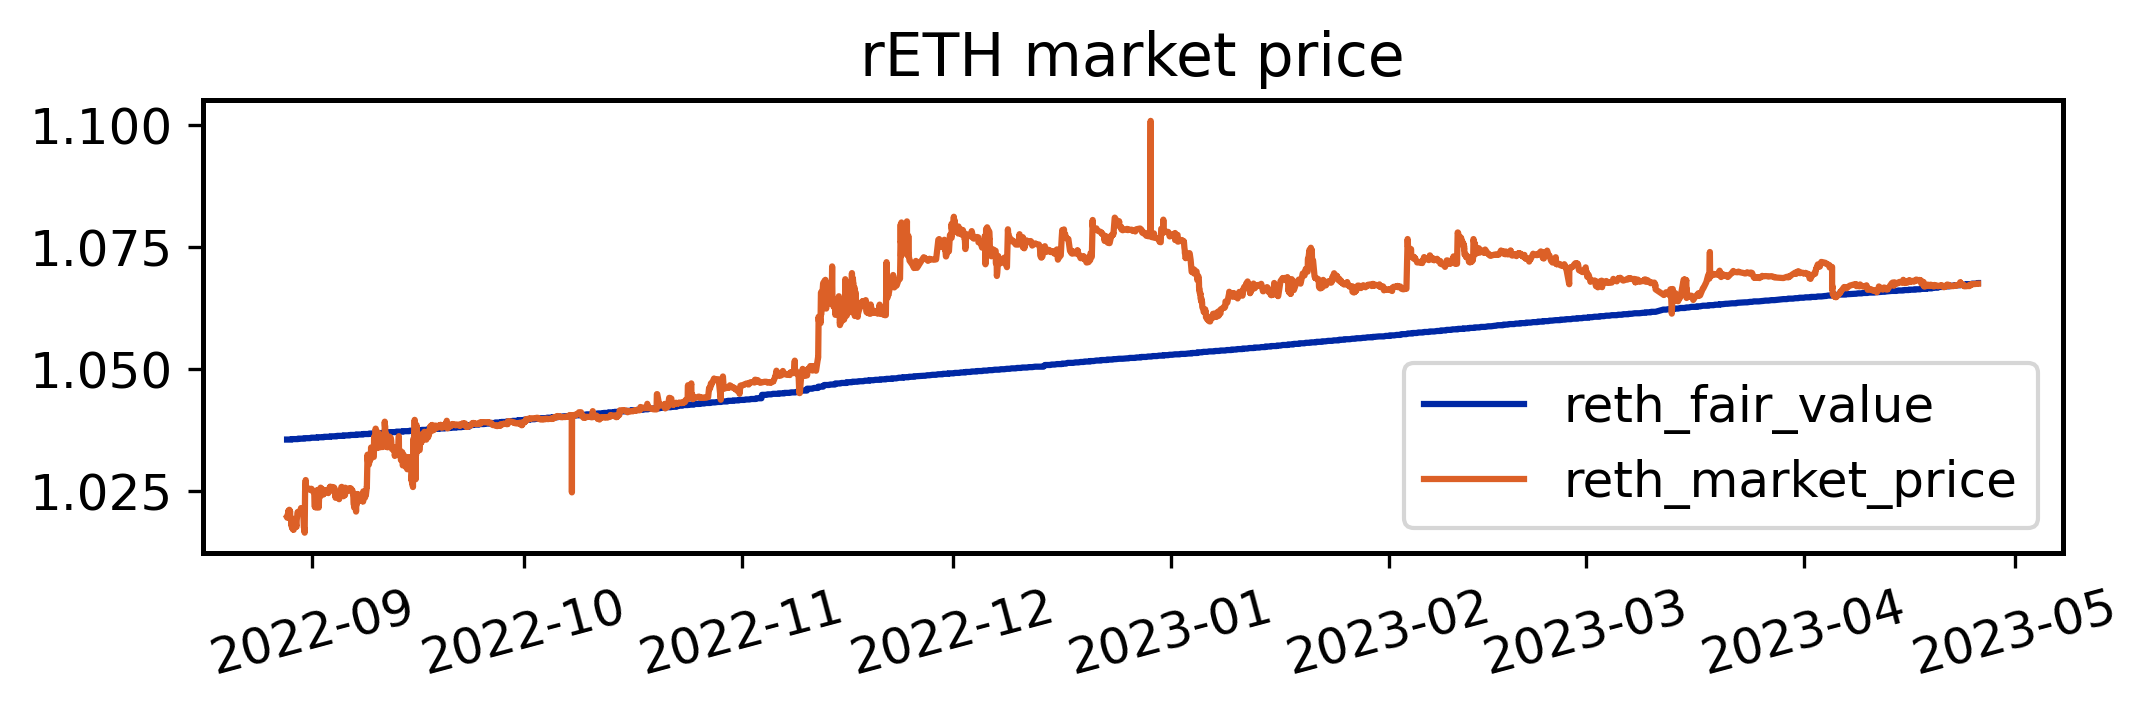

In [4]:
fig = plt.figure(figsize=(8, 2))
plt.plot(df['reth_fair_value'], label='reth_fair_value')
plt.plot(df['reth_market_price'],label='reth_market_price')
plt.xticks(rotation=15)
plt.legend()
plt.title('rETH market price')
plt.show()

In [5]:
def transform_to_daily(df, col):
   df = df.copy()
   df = df.sort_index()
   days_ = [str(date) for date in sorted(set(df.index.date.tolist()))]
   df_daily = {}
   for day in days_:
      df_daily[day]={} 
      df_daily[day]['open']=df.loc[day][col][0]
      df_daily[day]['close']=df.loc[day][col][-1]
      df_daily[day]['high']=df.loc[day][col].max()
      df_daily[day]['low']=df.loc[day][col].min()
   df_daily = pd.DataFrame.from_dict(df_daily, orient='index')
   df_daily.index = pd.to_datetime(df_daily.index)
   return df_daily

def hex_to_rgb(value):
    """Return (red, green, blue) for the color given as #rrggbb."""
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv+1, lv // 3))



In [6]:
df.columns

Index(['Unnamed: 0', 'reth_fair_value', 'reth_market_price', 'reth_premium'], dtype='object')

In [7]:
reth_fair = transform_to_daily(df,'reth_fair_value')
reth_market = transform_to_daily(df,'reth_market_price')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


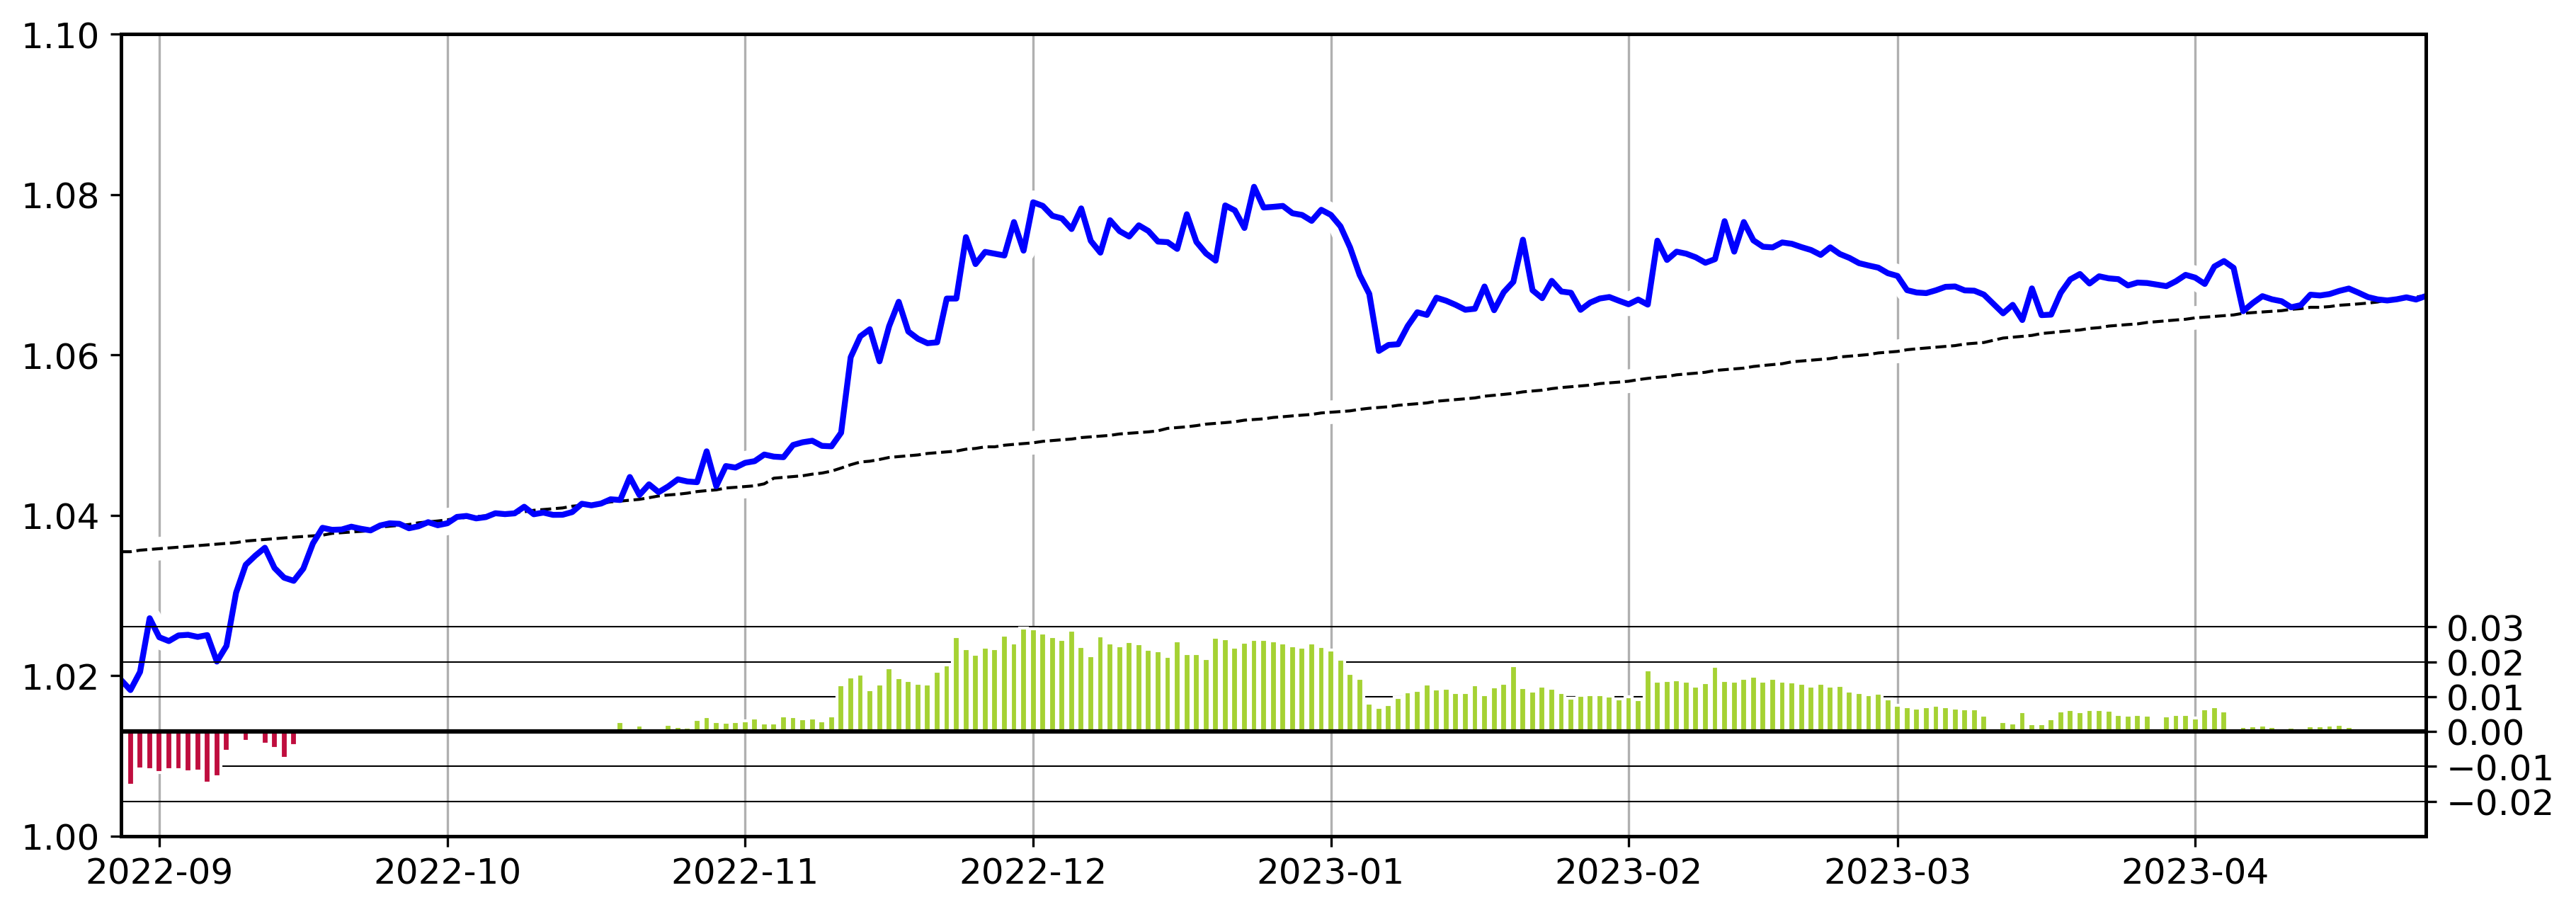

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

#plt.style.use('uzh')
plt.rcParams["font.family"] = "serif"
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)
width = 1
width2 = .3

ax2 = ax.twinx()
ax2.set_axisbelow(True)
ax2.axhline(0,c= 'k')
ax2.set_yticks([-0.02, -0.01,0, 0.01, 0.02,0.03])
grid_2 = ax2.grid(axis = 'y', lw = 0.5, color='k', zorder=-200)

ax.set_axisbelow(True)
ax.set_xlim(reth_fair.index.min(), reth_fair.index.max())
ax.set_ylim(1,1.1)
ax.grid(axis='x', zorder=100)

ax.plot(reth_fair.index, reth_fair.open, color = 'k', lw=1, ls = '--')
ax.plot(reth_fair.index, reth_market.open, color = 'b', lw=2) # path_effects=[pe.Stroke(linewidth=10, foreground='w'), pe.Normal()])

#----------------CANDLESTICKS------------------
#ax.bar(reth_market.index, reth_market.high-reth_market.low, width2, bottom=reth_market.low,
#       color=(reth_market.close-reth_market.open > 0).map({True: '#A5D233', False: '#BF0D3E'}), alpha =0.5)
#ax.bar(reth_market.index, reth_market.close-reth_market.open, width, bottom=reth_market.open, 
#        color=(reth_market.close-reth_market.open > 0).map({True: '#A5D233', False: '#BF0D3E'}),
#        edgecolor = 'k')

premium = reth_market.close - reth_fair.close
ax2.bar(reth_fair.index, premium, color=(premium > 0).map({True: '#A5D233', False: '#BF0D3E'}),
       edgecolor = 'w', linewidth = 1)
ax2.set_ylim(-0.03, 0.2)
#ax2.set_zorder(ax2.get_zorder()+10)

market = ax.plot(reth_fair.index, reth_fair.open, color = 'w', lw=8, zorder = 1)
fair = ax.plot(reth_fair.index, reth_market.open, color = 'w', lw=8, zorder = 1)

#price = ax.plot(reth_fair.index, reth_market.open, color = 'w', lw=5, zorder=1)
#ax.plot(reth_fair.index, reth_market.open, color = 'b', lw=2, path_effects=[pe.Stroke(linewidth=10, foreground='w'), pe.Normal()])

plt.show()

In [9]:
def resample_stock_data(df, timedelta):
    # make a copy
    df = df.copy()

    # convert index to datetime
    df.index = pd.to_datetime(df.index)

    # sort the index (evidently required by resample())
    df = df.sort_index()


    aggregation_dict = {
        'reth': 'mean', 
         'open': 'sum', 
         'high': 'sum',
         'low': 'sum',
         'close': 'sum',
         'Adj_Close': 'sum'
    }

    rename_dict = {
        'open': 'first',
        'high': 'max_price',
        'low': 'min_price',
        'close': 'last_price',
        'volume': 'vol (shares)',
        'Adj_Close': 'last',
    }


    return (df
      .resample(timedelta)
      .agg(aggregation_dict)
      .rename(columns=rename_dict)
    )

In [10]:
import os

data = []
cwd = os.getcwd()
for file in os.listdir('data/price'):
   filepath = os.path.join(cwd, 'data/price',file)
   _df = pd.read_csv(filepath)
   _df['timestamp']=pd.to_datetime(_df['timestamp'])
   _df=_df.set_index('timestamp')
   _df = transform_to_daily(_df, 'price')
   _df.currency_pair = file.split('.')[0]
   data.append(_df)
   

In [11]:
print(len(data))

9


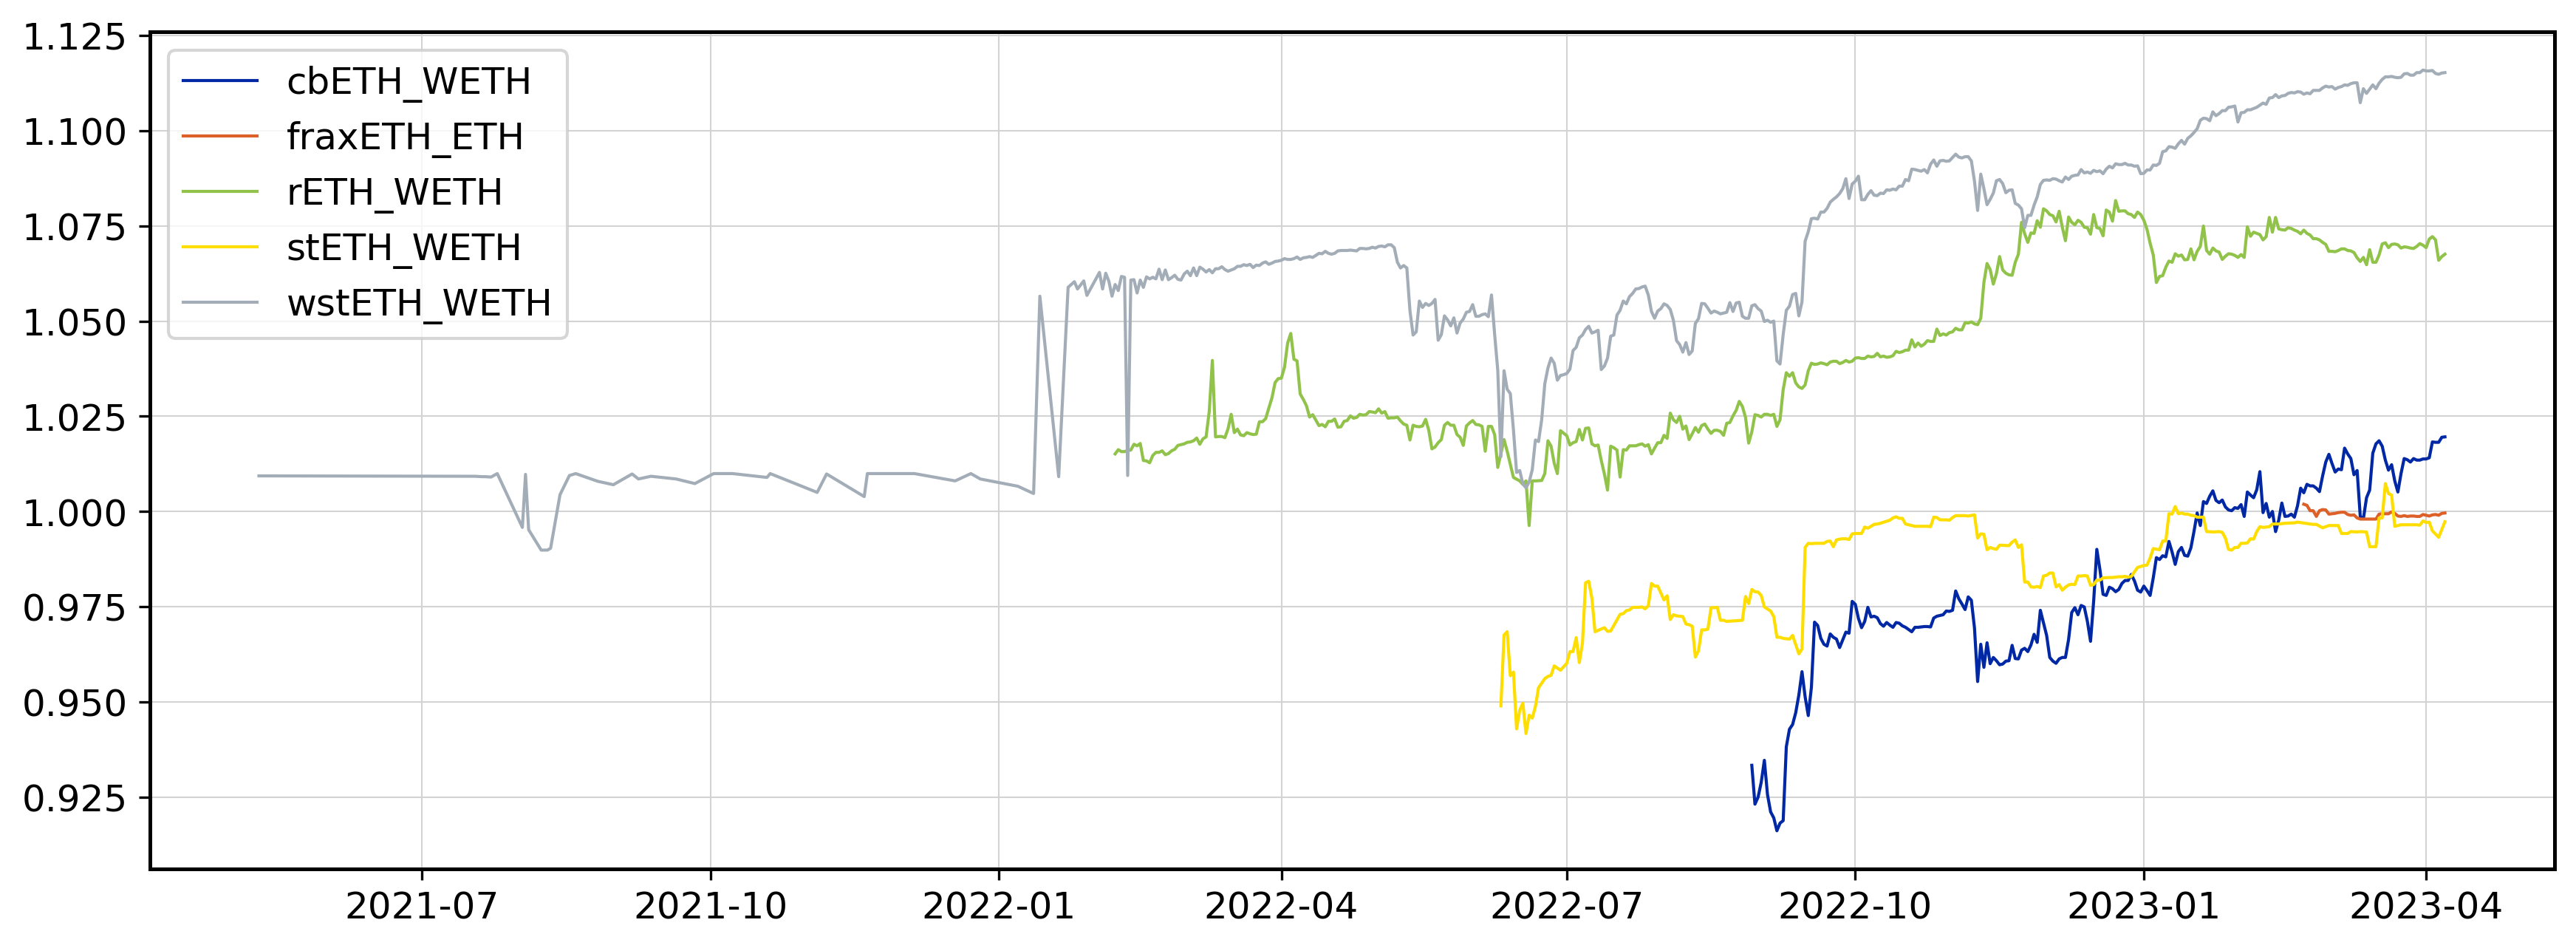

In [12]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for cur in data:
    if cur.currency_pair in ['SD_WETH','WETH_RPL','SWISE_WETH', 'ETH_sETH2']:
        continue
    ax.plot(cur.index, cur.close, lw=1, label = cur.currency_pair)

ax.set_axisbelow(True)
#ax.set_xlim(reth_fair.index.min(), reth_fair.index.max())
#ax.set_ylim(1,1.1)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [13]:
import os

data = []
cwd = os.getcwd()
xls = pd.ExcelFile('data/xls/LSD Data ETH.xlsx')
#print(xls.sheet_names)
data_eth_xlsx = []
for sheet in ['ETH', 'wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    _df = xls.parse(sheet)
    _df.dropna(subset=['Date'], inplace=True)
    _df['Date']=pd.to_datetime(_df['Date'])
    _df=_df.set_index('Date')
    _df.columns = _df.columns.str.lower()
    _df.token = sheet
    data_eth_xlsx.append(_df)
   
xls = pd.ExcelFile('data/ETH-USD-STORE.xlsx')
_df = xls.parse('ETH-USD')
_df.dropna(subset=['Date'], inplace=True)
_df['Date']=pd.to_datetime(_df['Date'])
_df=_df.set_index('Date')
_df.columns = _df.columns.str.lower()
_df.token = 'ETH-interest'
interest =  _df.copy()


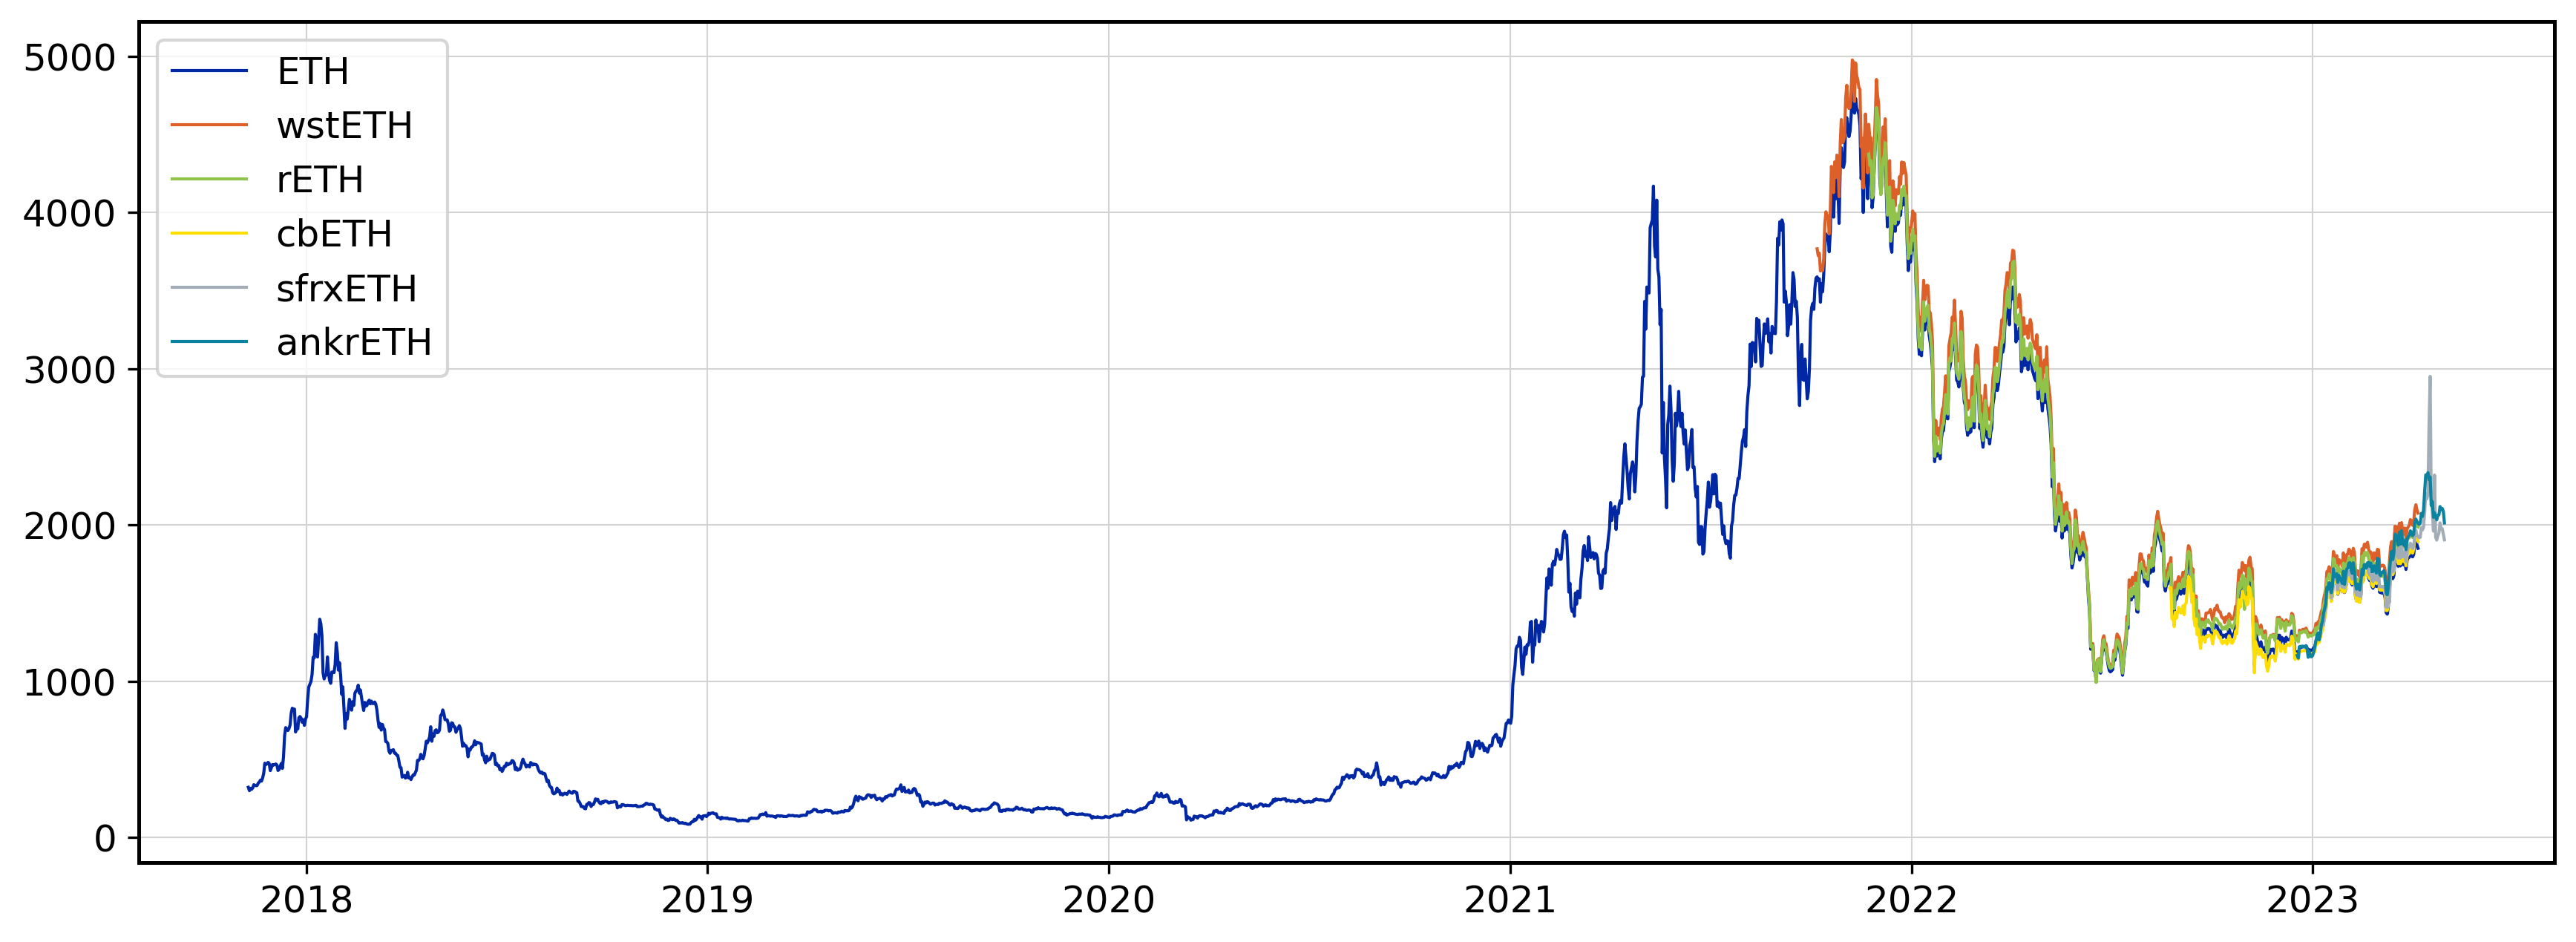

In [14]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for cur in data_eth_xlsx:
    ax.plot(cur.index, cur.close, lw=1, label = cur.token)

ax.set_axisbelow(True)
#ax.set_xlim(reth_fair.index.min(), reth_fair.index.max())
#ax.set_ylim(1,1.1)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [15]:

result = pd.concat([d.close for d in data_eth_xlsx], axis=1, join="outer", keys= [d.token for d in data_eth_xlsx])

result = result.div(result['ETH'].values,axis=0)
result = result.drop('ETH', axis=1)


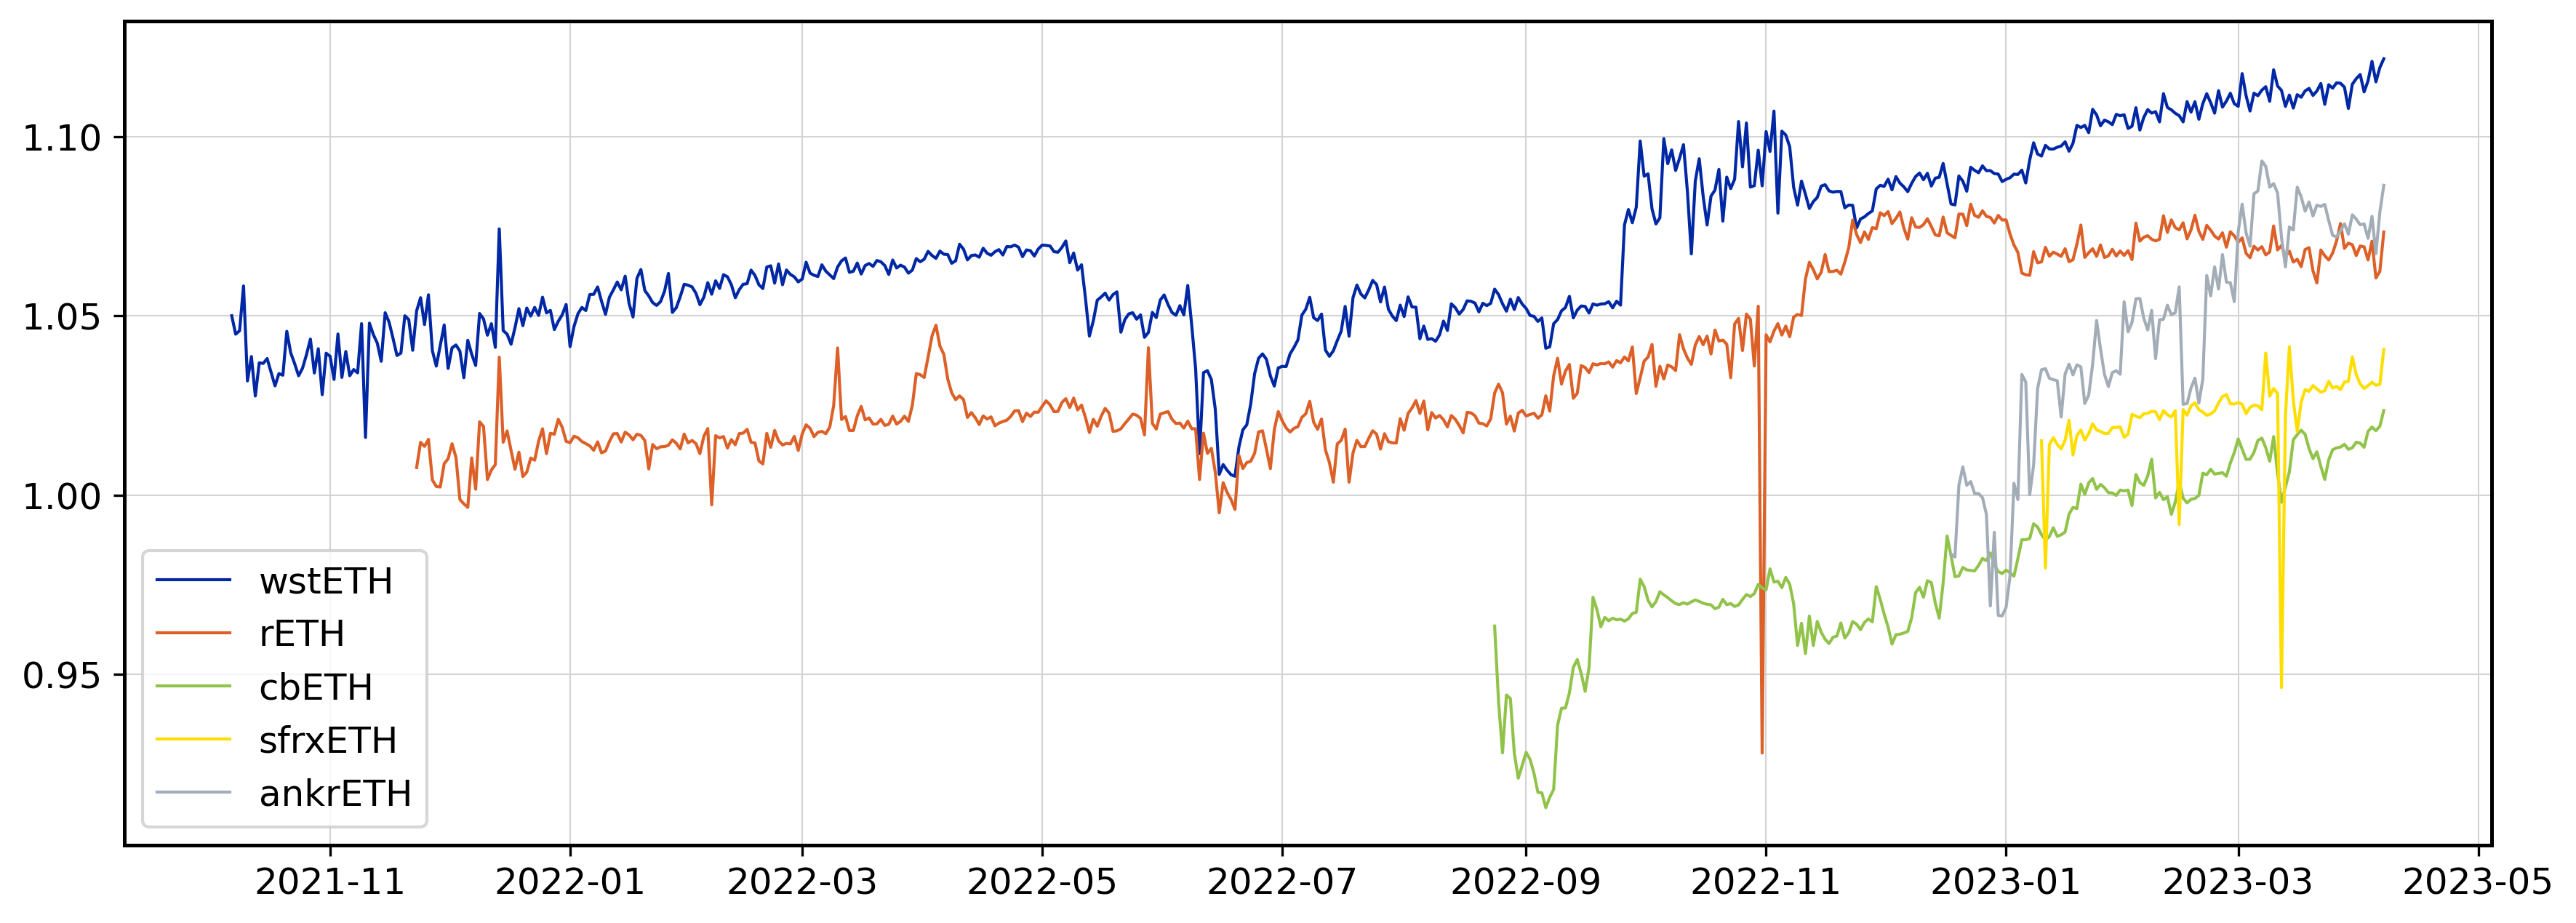

In [16]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in result.columns:
    ax.plot(result.index, result[col], lw=1, label = col)

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [17]:
interest['daily']=(1+np.array(interest['eth.store'])/100)**(1/365)
interest['daily_accrued']= interest['daily'].cumprod()
interest['daily_eth_change']=interest['adj close'].pct_change(1)
interest['daily_accrued_eth']= (1+interest['daily_eth_change']).cumprod()
interest['monthly_ETH_std'] = interest['daily_eth_change'].rolling(30).std()


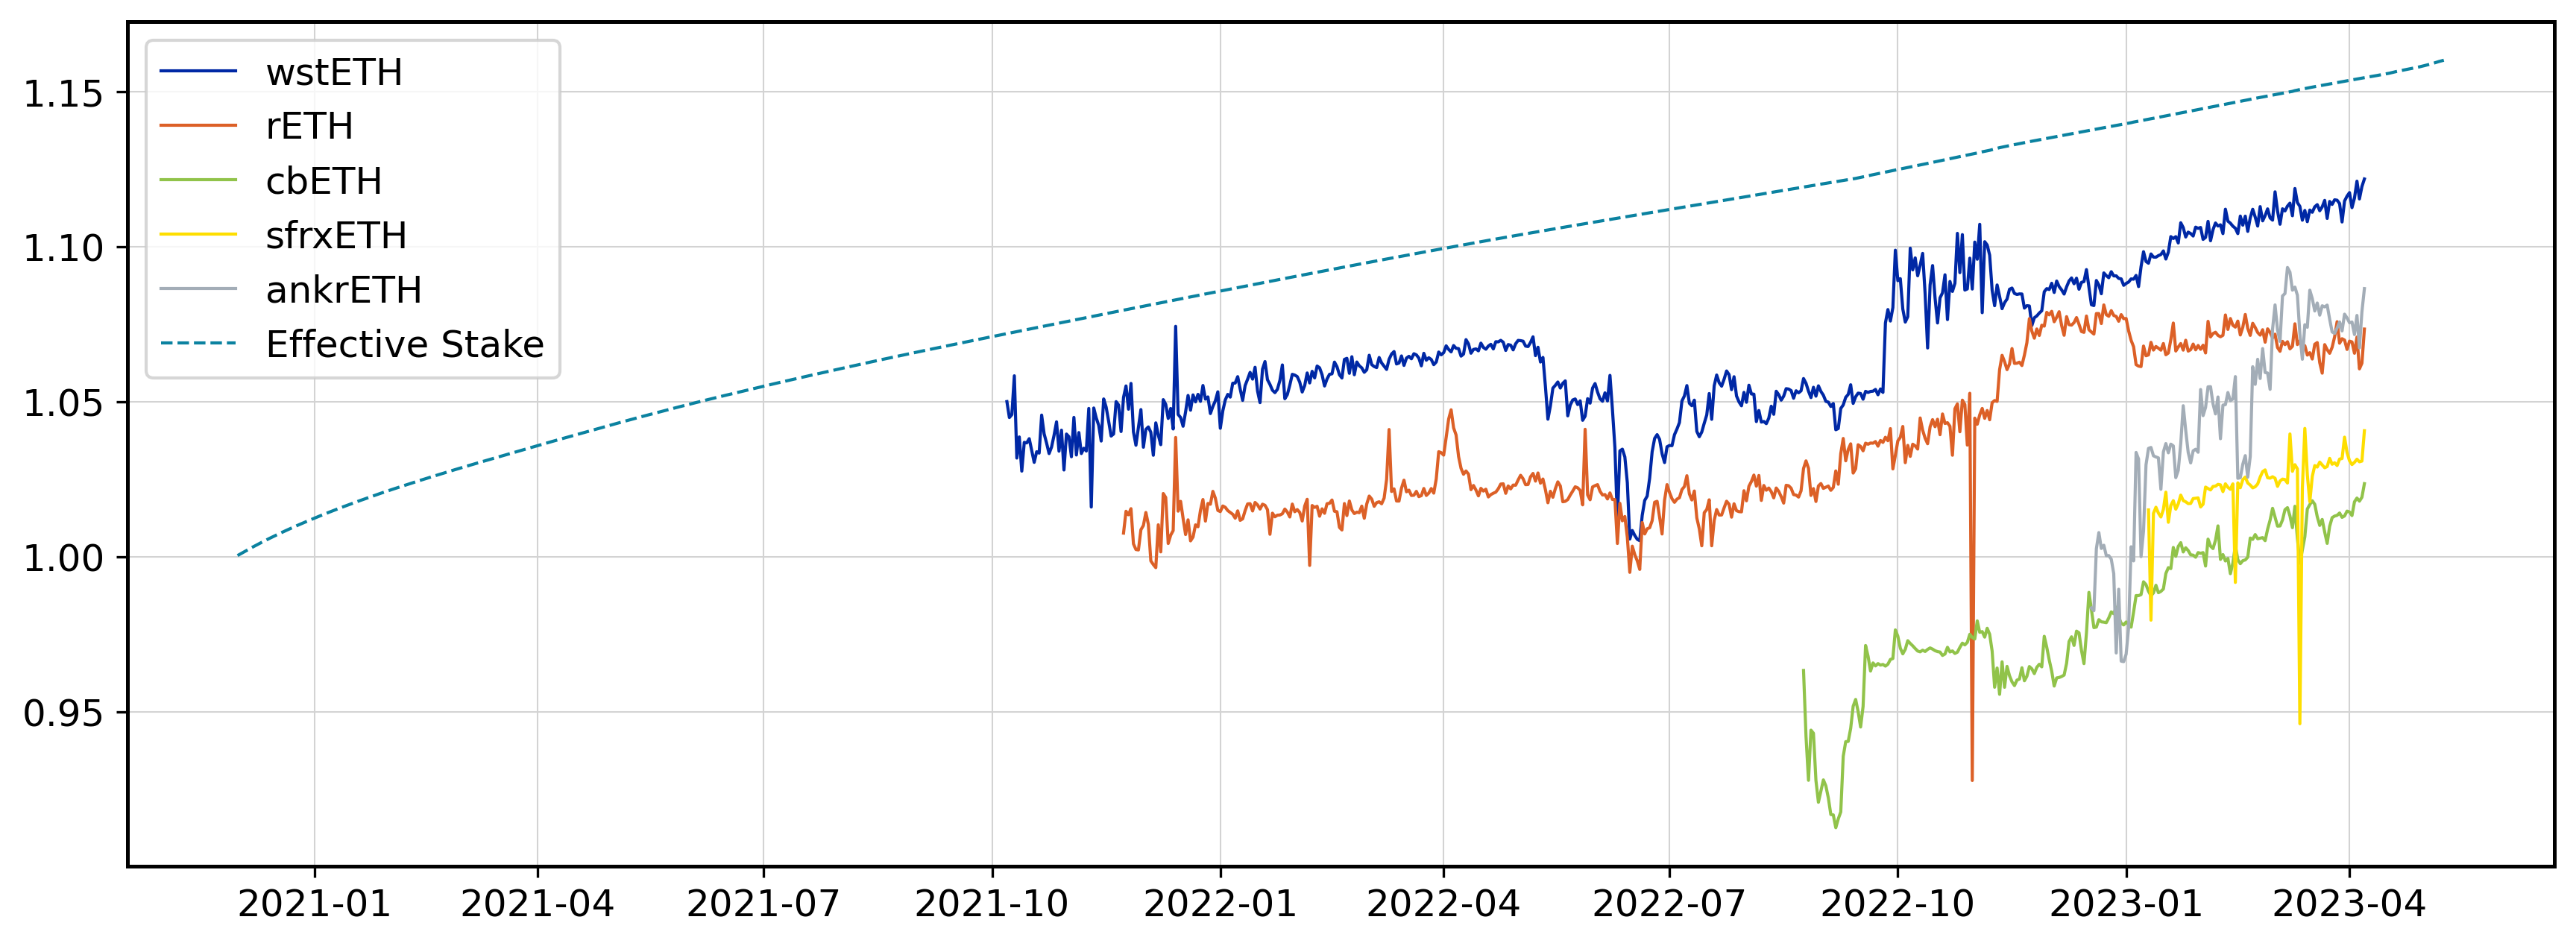

In [18]:

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in result.columns:
    ax.plot(result.index, result[col], lw=1, label = col)

ax.plot(interest.index, interest['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

plt.show()

In [19]:
result_with_interest = pd.concat([result, interest.daily], axis=1, join="outer")
result_with_interest.dropna(subset=['wstETH'], inplace=True)
result_with_interest['daily_accrued']= result_with_interest['daily'].cumprod()

In [20]:
result_with_interest

wstETH      rETH     cbETH   sfrxETH   ankrETH     daily  \
Date                                                                     
2021-10-07  1.050049       NaN       NaN       NaN       NaN  1.000151   
2021-10-08  1.044903       NaN       NaN       NaN       NaN  1.000152   
2021-10-09  1.045851       NaN       NaN       NaN       NaN  1.000151   
2021-10-10  1.058360       NaN       NaN       NaN       NaN  1.000150   
2021-10-11  1.031851       NaN       NaN       NaN       NaN  1.000151   
...              ...       ...       ...       ...       ...       ...   
2023-04-03  1.115621  1.065619  1.017763  1.030477  1.071639  1.000130   
2023-04-04  1.121060  1.070843  1.018963  1.031477  1.077800  1.000125   
2023-04-05  1.115341  1.060583  1.017965  1.030642  1.067368  1.000119   
2023-04-06  1.119331  1.062416  1.019211  1.030875  1.078969  1.000119   
2023-04-07  1.121776  1.073414  1.023604  1.040659  1.086451  1.000118   

            daily_accrued  
Date                       
2021-10-07       1.000151  
2021-10-08       1.000303  
2021-10-09       1.000454  
2021-10-10       1.000604  
2021-10-11       1.000756  
...                   ...  
2023-04-03       1.076567  
2023-04-04       1.076701  
2023-04-05       1.076829  
2023-04-06       1.076957  
2023-04-07       1.077084  

[548 rows x 7 columns]

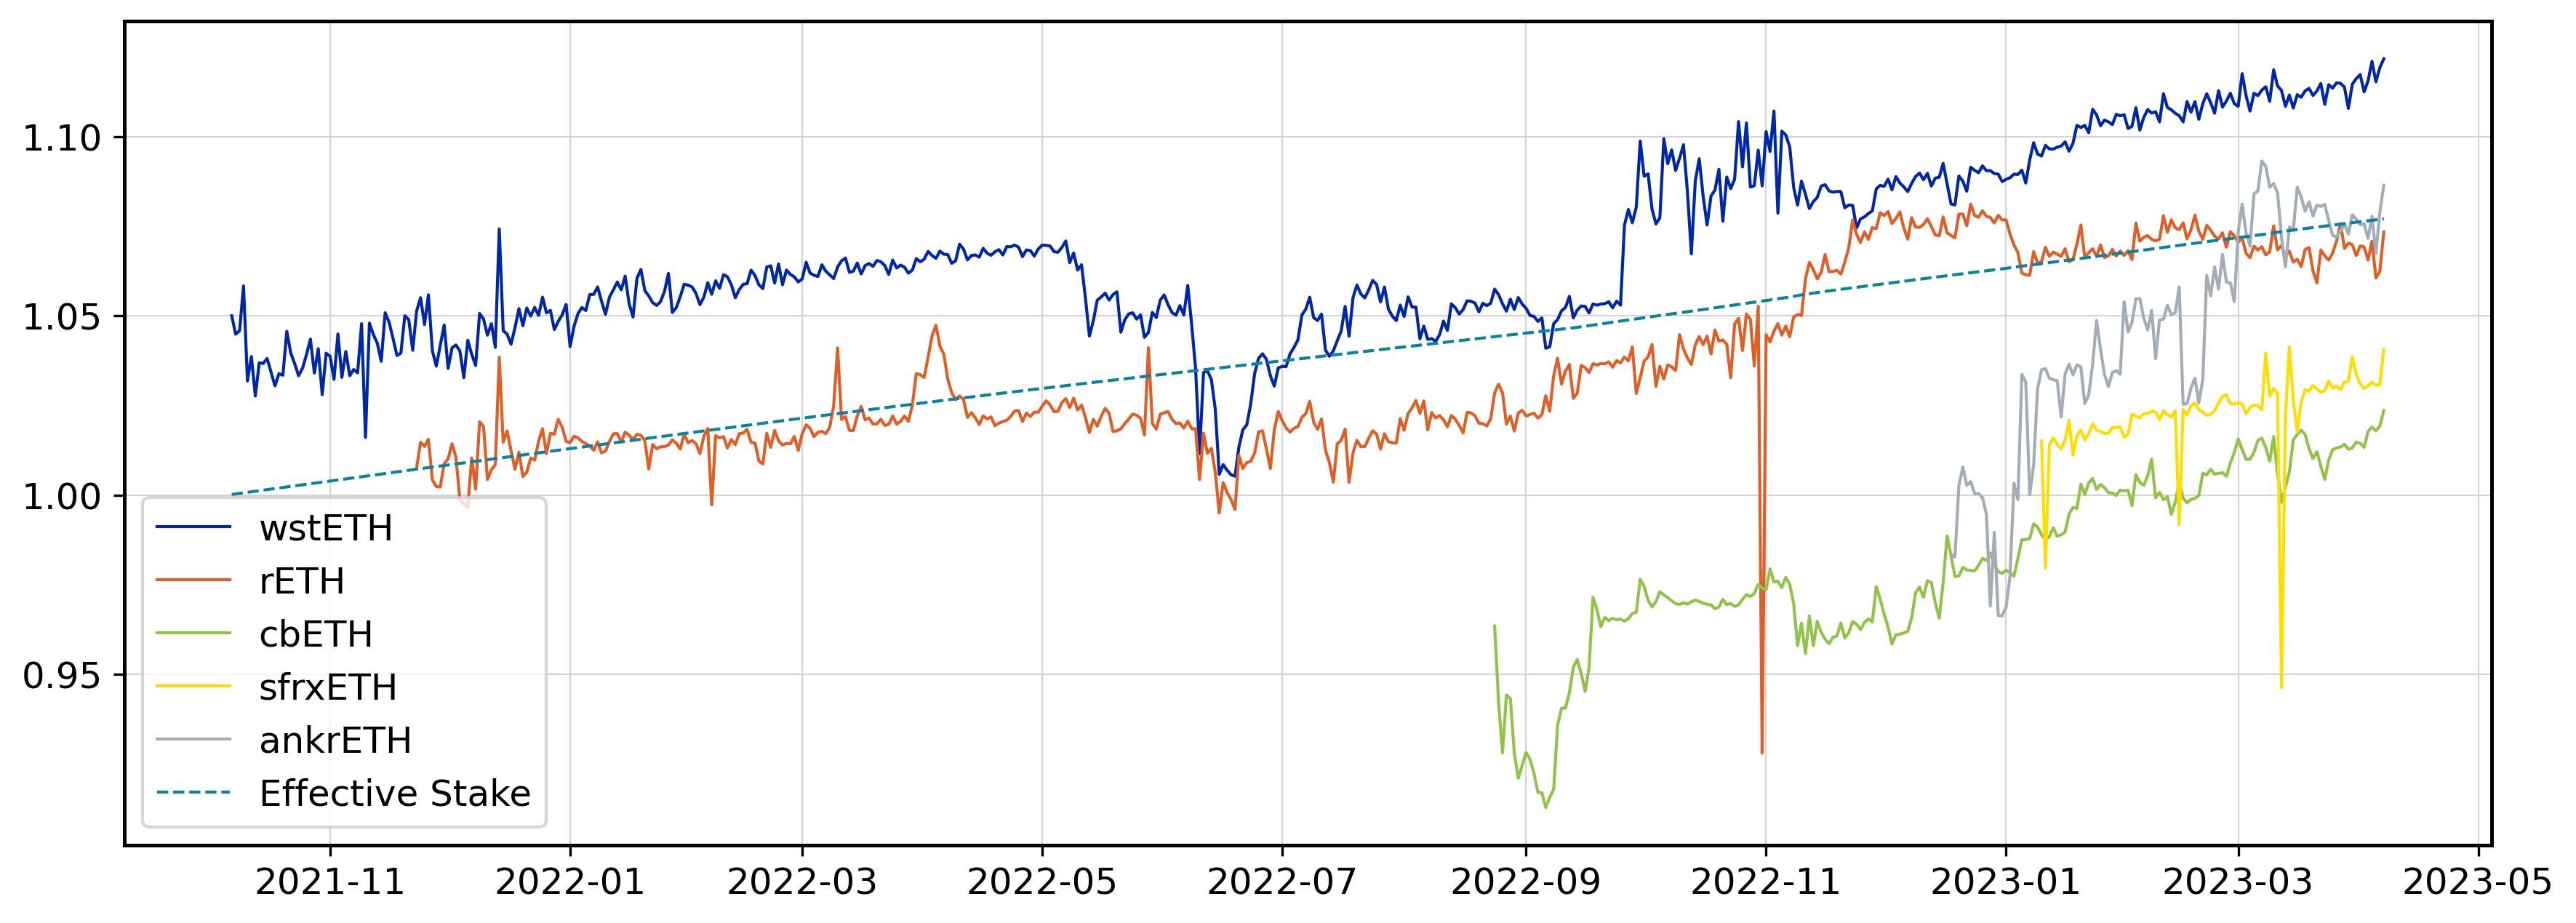

In [21]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.plot(data_to_plot.index, data_to_plot[col].rolling(window=1).mean(), lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

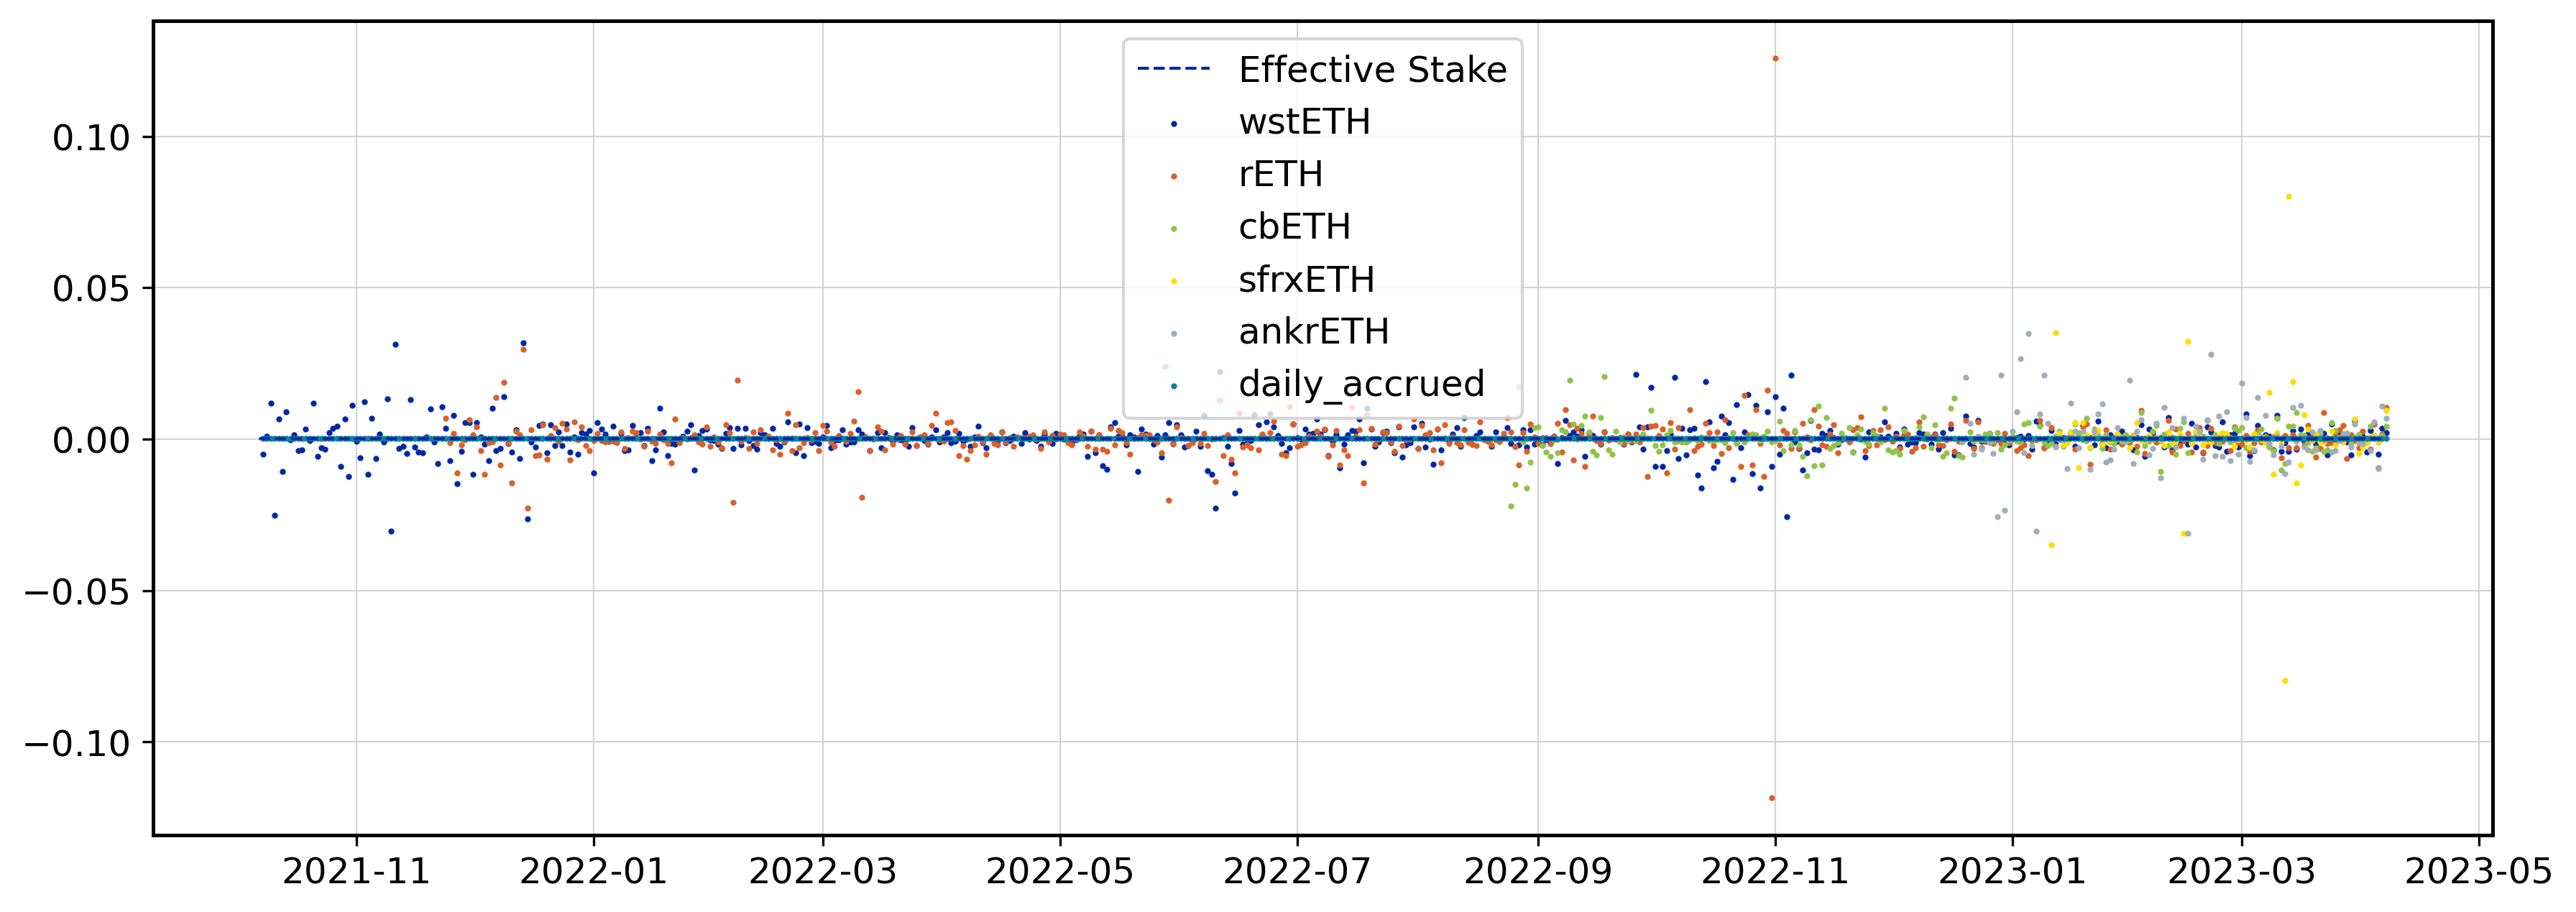

In [22]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col == 'daily':
        continue
    ax.scatter(data_to_plot.index, data_to_plot[col].pct_change(1), s=1,lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily']-1, lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

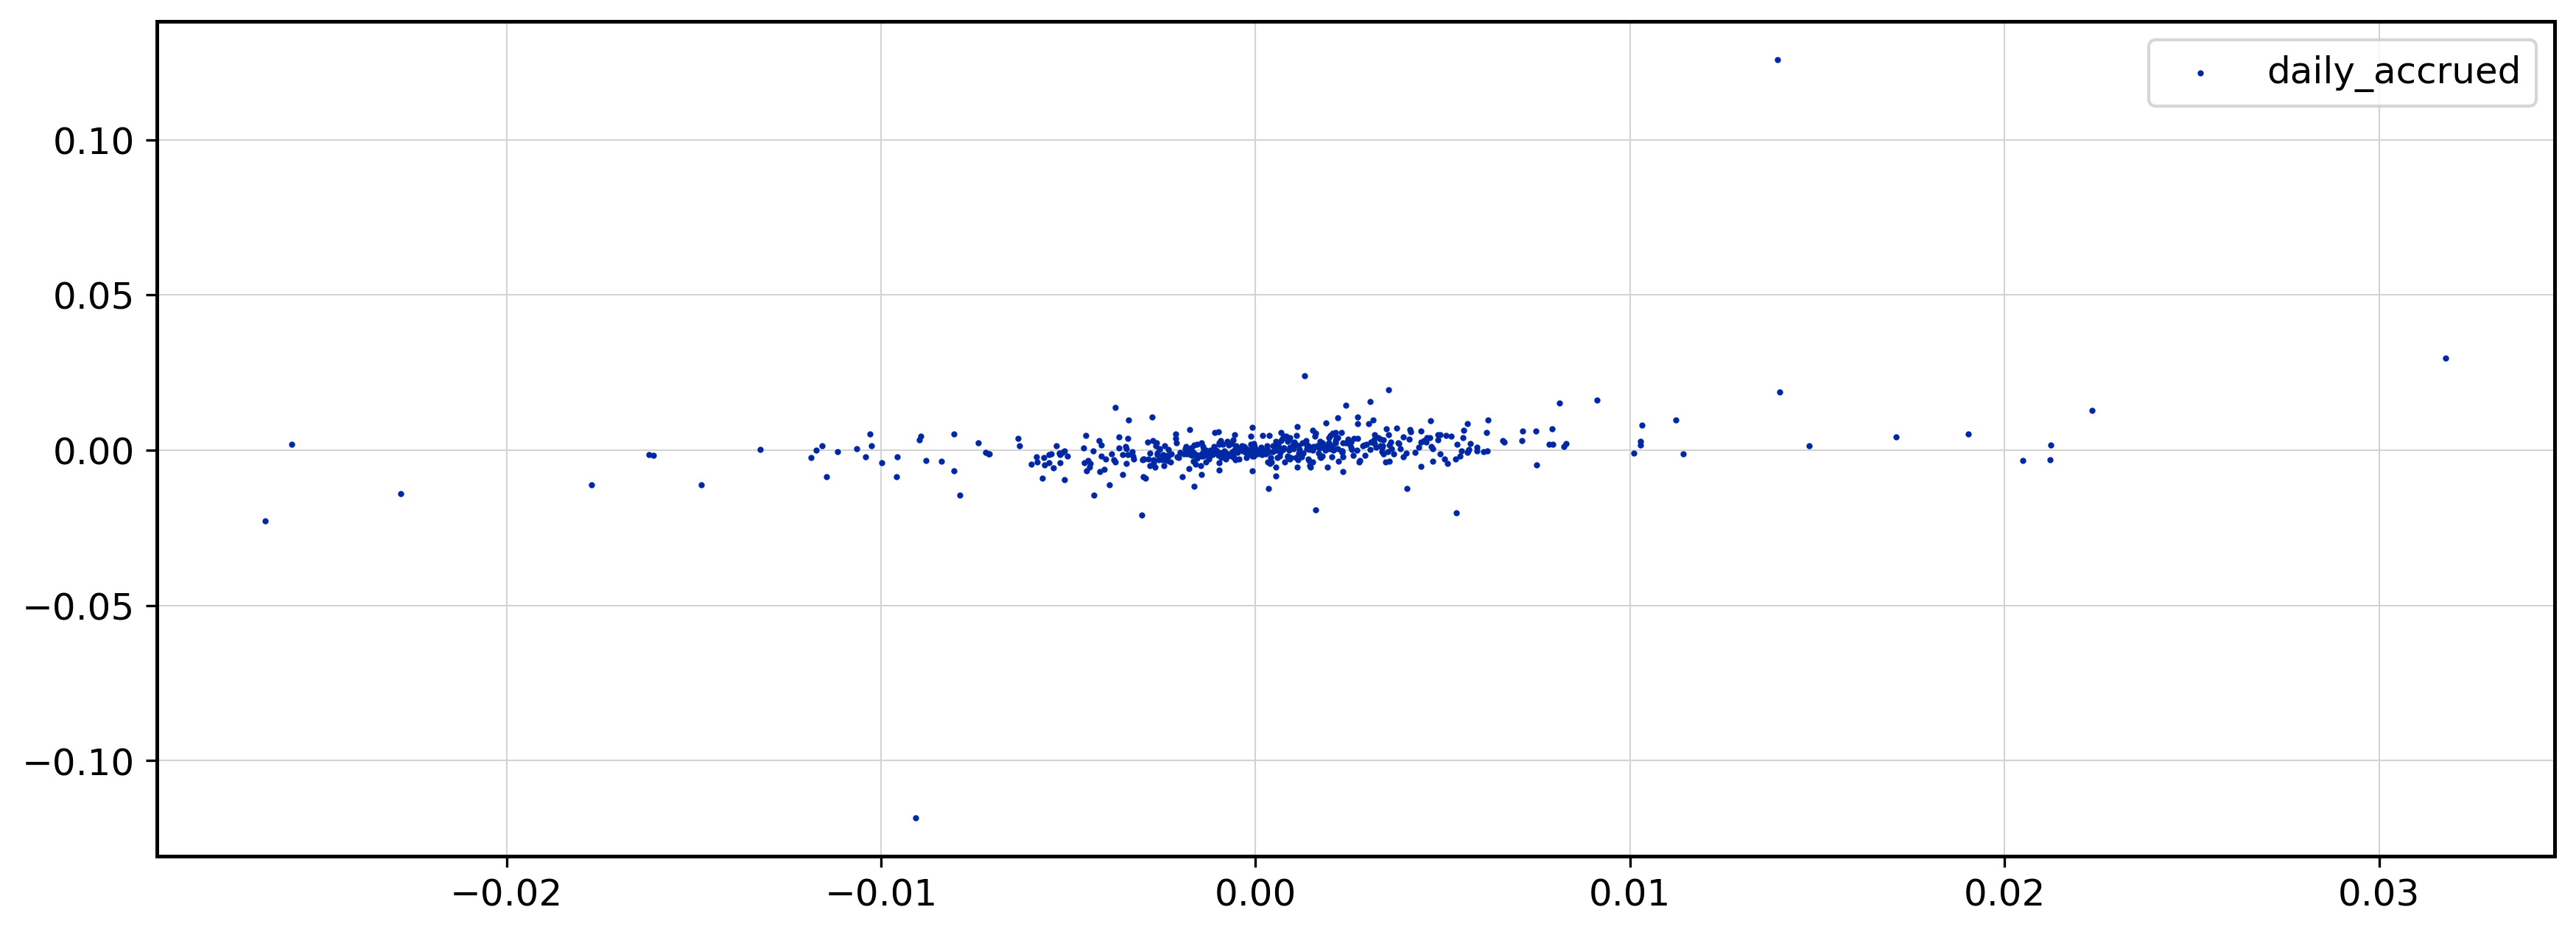

In [23]:
data_to_plot = result_with_interest
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

ax.scatter(data_to_plot['wstETH'].pct_change(1), data_to_plot['rETH'].pct_change(1), s=1,lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily']-1, lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [24]:
data_to_plot.pct_change(1).describe()

wstETH        rETH       cbETH    sfrxETH     ankrETH  \
count  547.000000  500.000000  226.000000  87.000000  110.000000   
mean     0.000138    0.000169    0.000280   0.000394    0.000955   
std      0.005901    0.009201    0.004807   0.014790    0.010001   
min     -0.030312   -0.118502   -0.022028  -0.079852   -0.030979   
25%     -0.002315   -0.002010   -0.001583  -0.001150   -0.003665   
50%      0.000075   -0.000004    0.000191   0.000119    0.000039   
75%      0.002516    0.002263    0.002213   0.001721    0.005203   
max      0.031769    0.125810    0.020604   0.080127    0.034979   

              daily  daily_accrued  
count  5.470000e+02     547.000000  
mean  -6.130099e-08       0.000135  
std    7.633819e-06       0.000013  
min   -6.831150e-05       0.000112  
25%   -6.818695e-07       0.000125  
50%   -1.037795e-07       0.000135  
75%    4.447405e-07       0.000145  
max    7.397180e-05       0.000211

In [25]:
#df[df['A'].isnull()].index.tolist()

In [26]:
_df = result_with_interest.copy()
adjusted_results = result_with_interest.copy()
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    adjusted_results[col]= (adjusted_results[col]/_df.loc[(min(_df[_df[col].notnull()].index.tolist()))][col])*_df.loc[(min(_df[_df[col].notnull()].index.tolist()))]['daily_accrued']


    

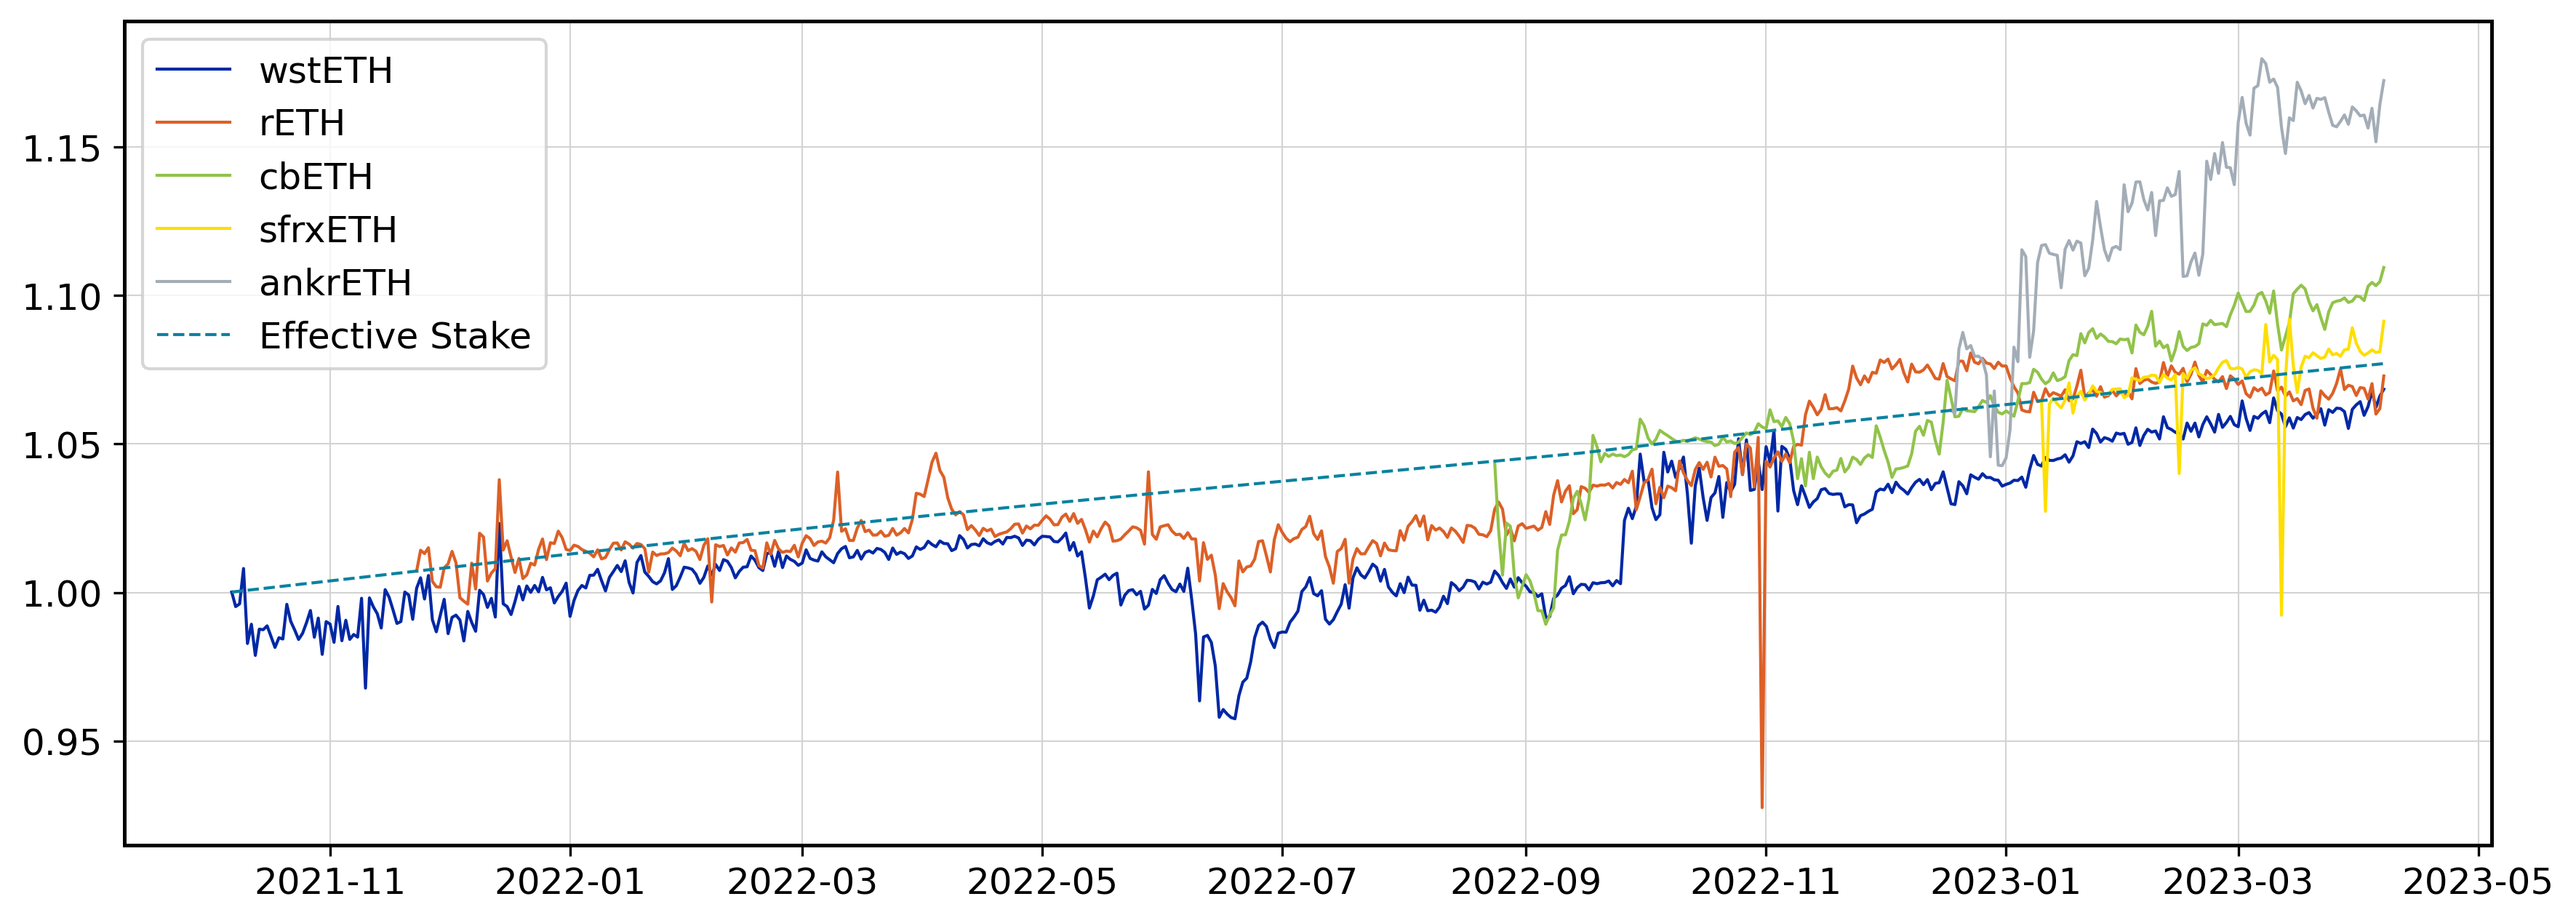

In [27]:
data_to_plot = adjusted_results
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.plot(data_to_plot.index, data_to_plot[col], lw=1, label = col)

ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


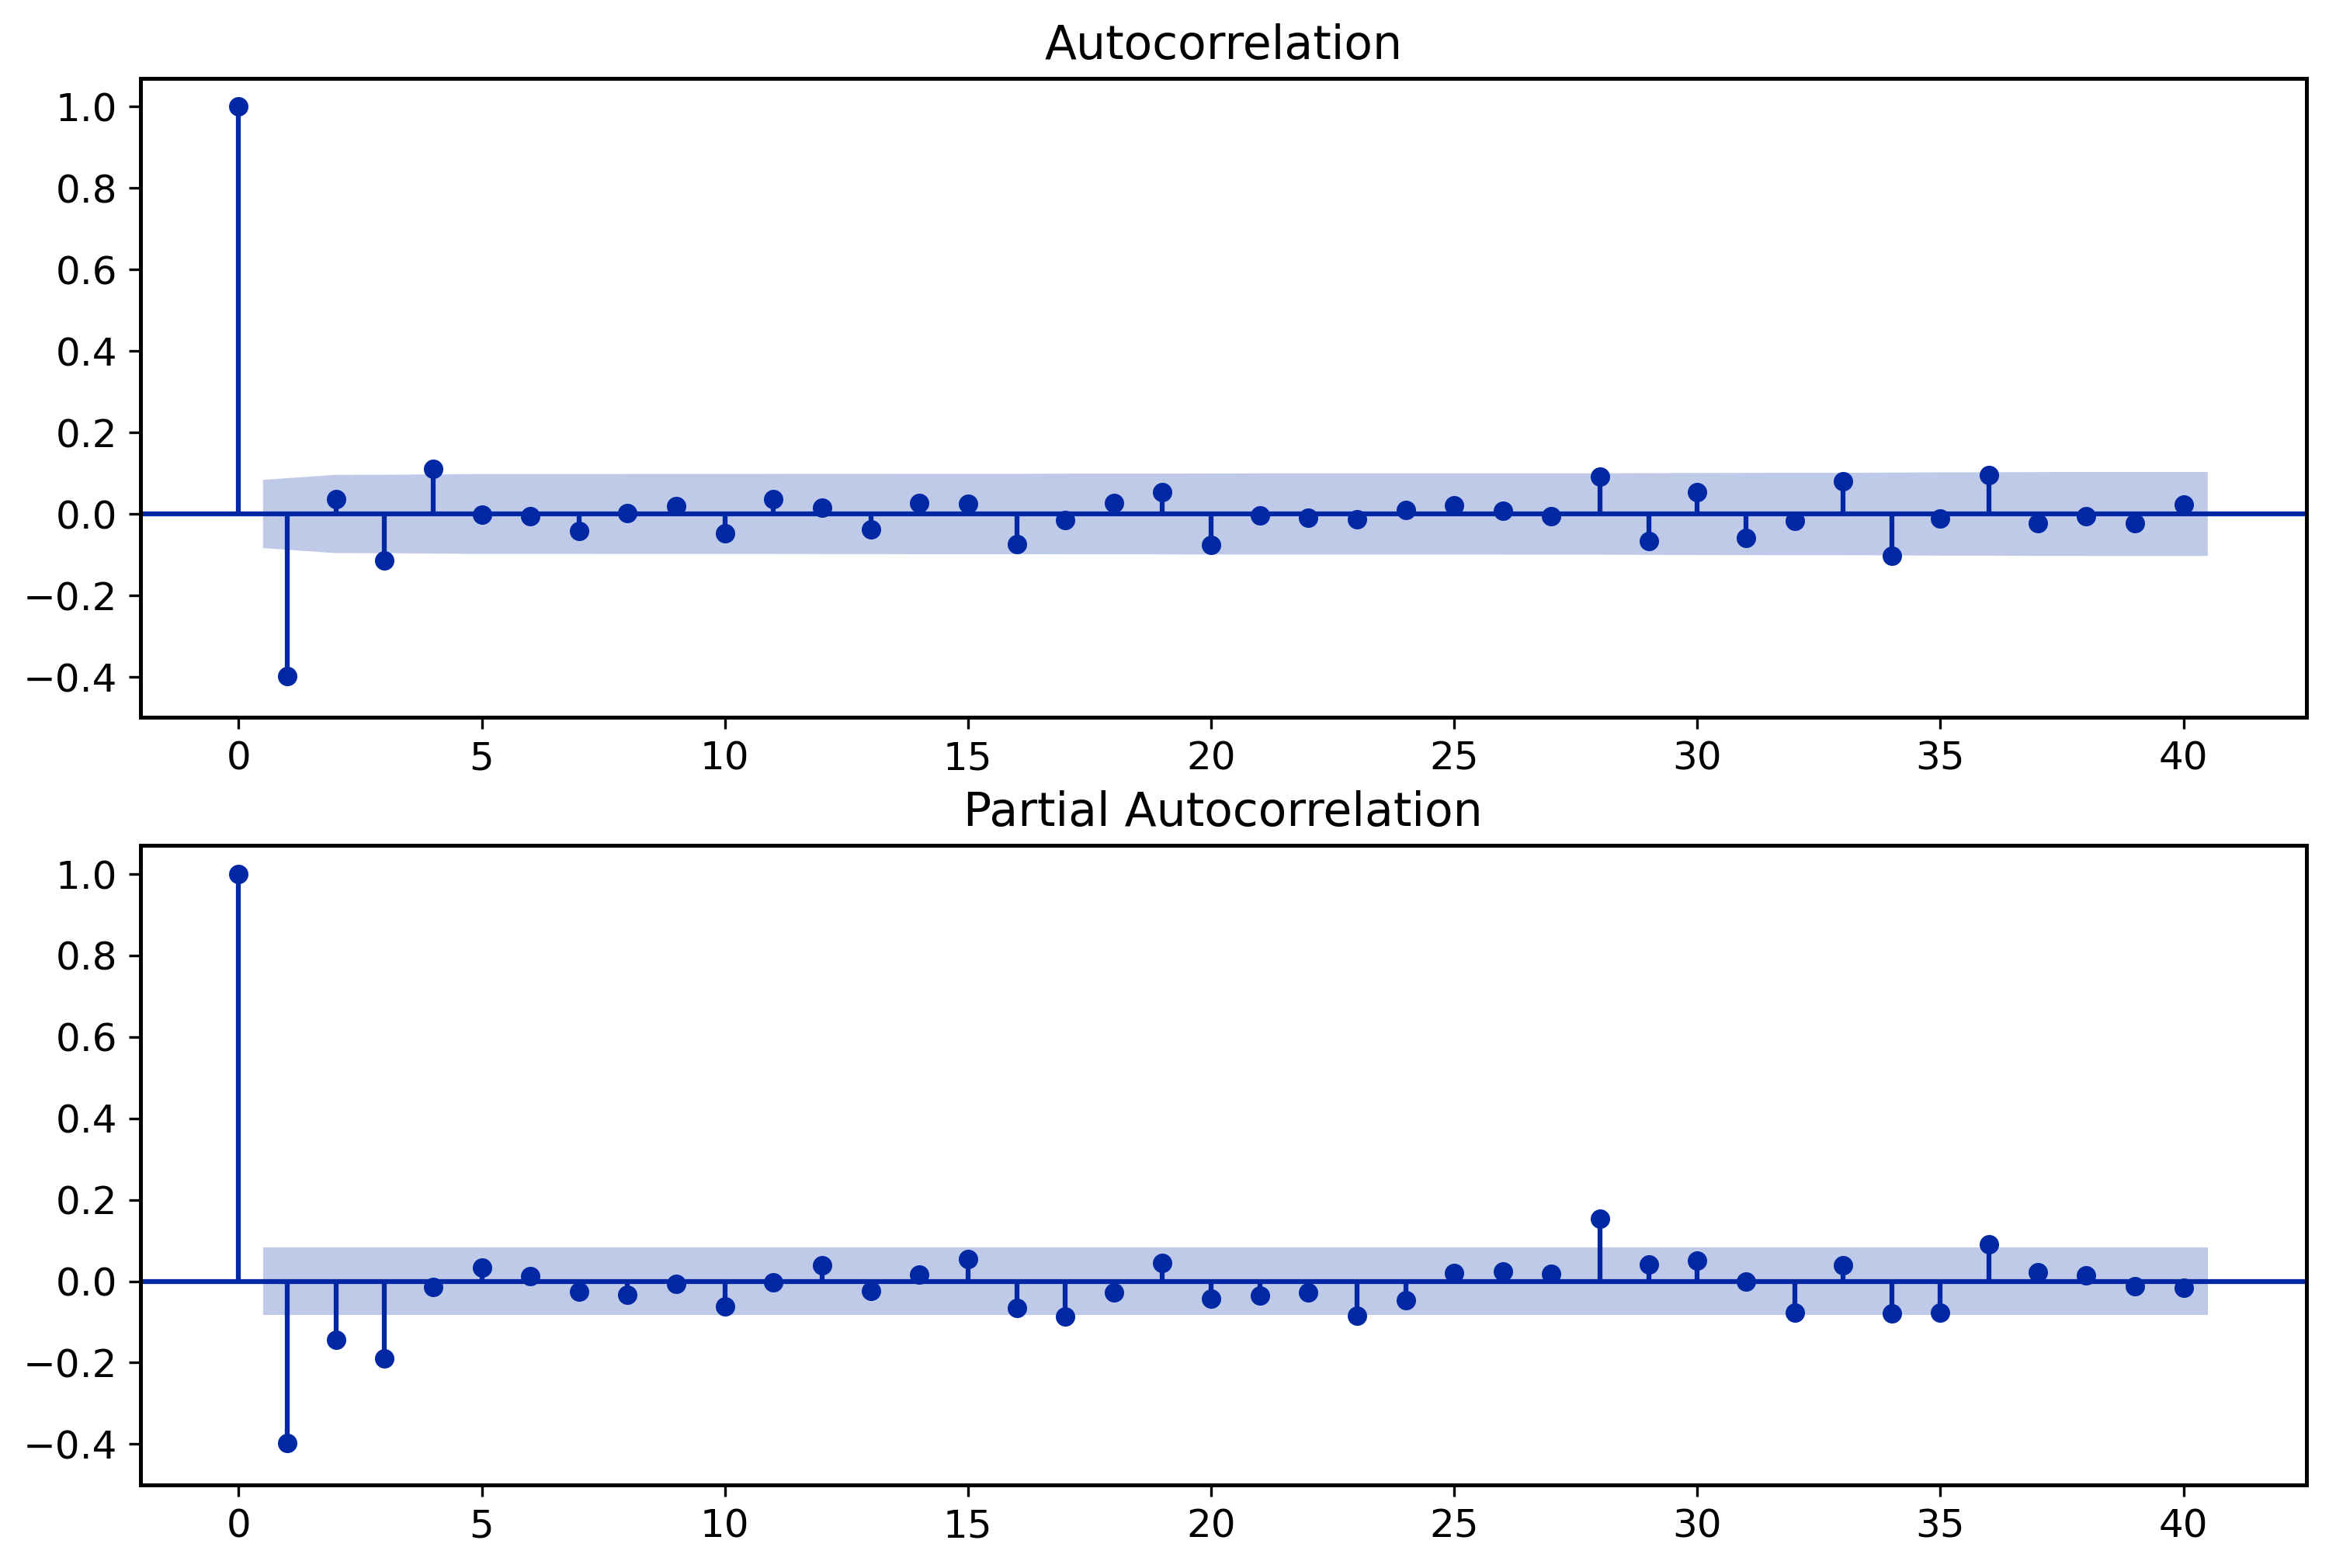

In [28]:
df1 =  adjusted_results

import statsmodels.api as sm
plt.rcParams['figure.figsize']=(12,8)
fig,axs=plt.subplots(2,1)
fig1=sm.graphics.tsa.plot_acf(df1['wstETH'].pct_change(1).dropna(),lags=40,ax=axs[0])
fig2=sm.graphics.tsa.plot_pacf(df1['wstETH'].pct_change(1).dropna(),lags=40,ax=axs[1])

for ax in axs:
    ax.set_ylim(-.5)

In [29]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df1['rETH'].pct_change(1),order=(2,1,3))
model_results=model.fit()
model_results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   rETH   No. Observations:                  548
Model:                 ARIMA(2, 1, 3)   Log Likelihood                1683.274
Date:                Sat, 13 May 2023   AIC                          -3354.547
Time:                        11:25:30   BIC                          -3328.721
Sample:                    10-07-2021   HQIC                         -3344.452
                         - 04-07-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4435      0.066    -21.850      0.000      -1.573      -1.314
ar.L2         -0.6708      0.034    -19.565      0.000      -0.738      -0.604
ma.L1         -0.1257      0.068     -1.846      0.065      -0.259       0.008
ma.L2         -0.6863      0.083     -8.239      0.000      -0.850      -0.523
ma.L3         -0.1314      0.061     -2.160      0.031      -0.251      -0.012
sigma2       6.57e-05   8.72e-07     75.354      0.000     6.4e-05    6.74e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.88   Jarque-Bera (JB):            166721.86
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                            -2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        88.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

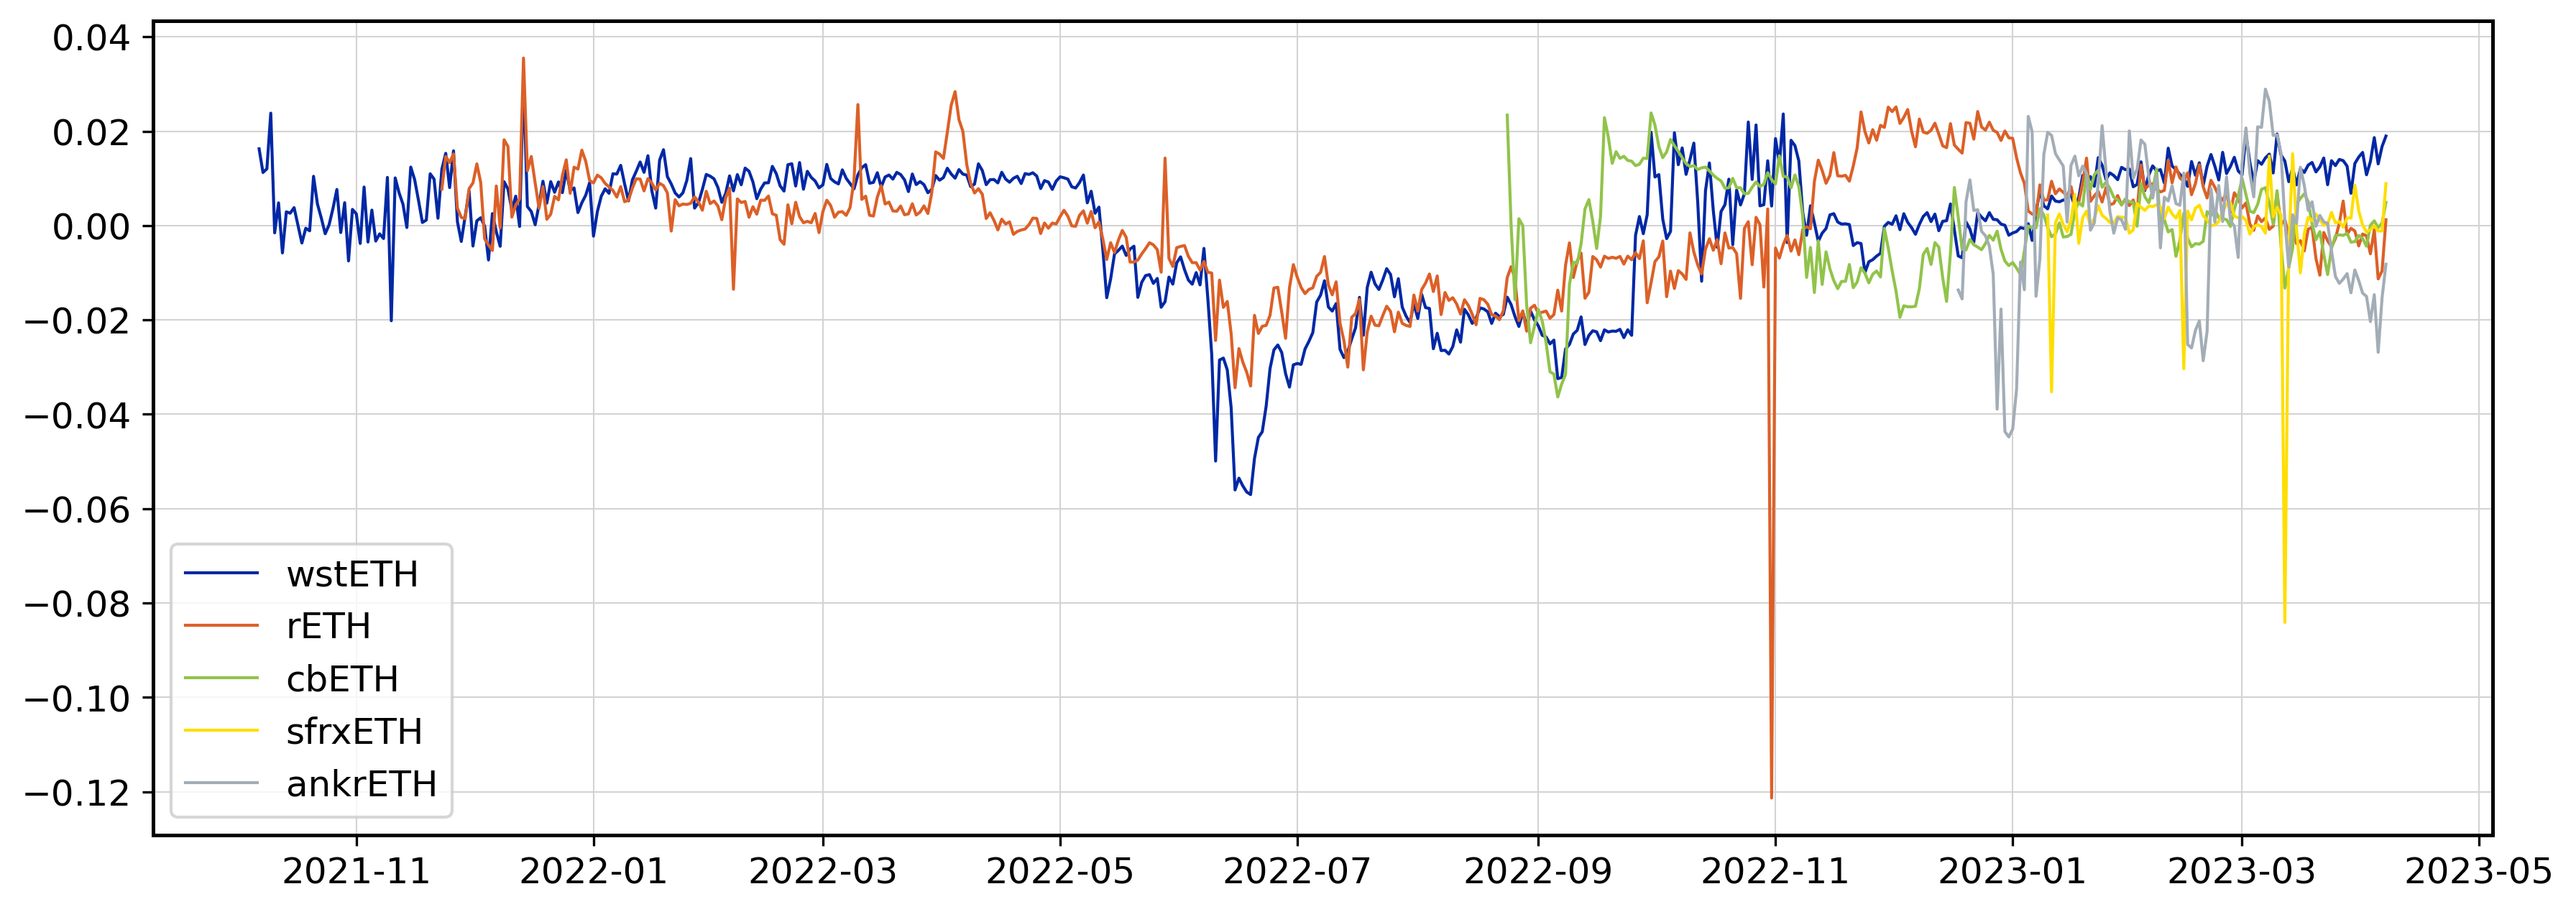

In [30]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = adjusted_results
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.plot(data_to_plot[data_to_plot[col].notnull()].index, signal.detrend(data_to_plot[data_to_plot[col].notnull()][col].values), lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [31]:
data_to_plot[data_to_plot[col].notnull()][col].values

array([1.00015106, 1.00030268, 1.00045407, 1.00060406, 1.00075565,
       1.00090508, 1.00105391, 1.00120458, 1.00135577, 1.00150282,
       1.00164737, 1.00179774, 1.00194907, 1.0021003 , 1.00225149,
       1.00240302, 1.00255483, 1.00270596, 1.00285756, 1.00300998,
       1.00315133, 1.00330169, 1.00345234, 1.0036034 , 1.00375464,
       1.00390582, 1.00405734, 1.00420872, 1.00435966, 1.00451085,
       1.00466192, 1.0048124 , 1.00496241, 1.00511234, 1.00526235,
       1.00541209, 1.00556188, 1.00571177, 1.0058616 , 1.00601148,
       1.00616068, 1.00630993, 1.00645964, 1.00660873, 1.00675637,
       1.0069044 , 1.00705271, 1.00720096, 1.00734846, 1.00749641,
       1.00764377, 1.00779127, 1.00793872, 1.00808687, 1.00823533,
       1.00838316, 1.00853119, 1.00867772, 1.00882425, 1.00897125,
       1.00911824, 1.00926528, 1.00941297, 1.00955998, 1.00970734,
       1.00985431, 1.01000119, 1.01014862, 1.01029697, 1.01044489,
       1.0105932 , 1.01074145, 1.01088969, 1.01103731, 1.01118

In [50]:
adjusted_results 

wstETH      rETH     cbETH   sfrxETH   ankrETH     daily  \
Date                                                                     
2021-10-07  1.000151       NaN       NaN       NaN       NaN  1.000151   
2021-10-08  0.995250       NaN       NaN       NaN       NaN  1.000152   
2021-10-09  0.996153       NaN       NaN       NaN       NaN  1.000151   
2021-10-10  1.008068       NaN       NaN       NaN       NaN  1.000150   
2021-10-11  0.982818       NaN       NaN       NaN       NaN  1.000151   
...              ...       ...       ...       ...       ...       ...   
2023-04-03  1.062607  1.065122  1.103123  1.080669  1.156429  1.000130   
2023-04-04  1.067788  1.070343  1.104424  1.081718  1.163078  1.000125   
2023-04-05  1.062341  1.060089  1.103342  1.080843  1.151820  1.000119   
2023-04-06  1.066141  1.061920  1.104692  1.081087  1.164339  1.000119   
2023-04-07  1.068470  1.072914  1.109455  1.091348  1.172412  1.000118   

            daily_accrued  
Date                       
2021-10-07       1.000151  
2021-10-08       1.000303  
2021-10-09       1.000454  
2021-10-10       1.000604  
2021-10-11       1.000756  
...                   ...  
2023-04-03       1.076567  
2023-04-04       1.076701  
2023-04-05       1.076829  
2023-04-06       1.076957  
2023-04-07       1.077084  

[548 rows x 7 columns]

In [33]:
_df = adjusted_results.copy()
excess_returns = adjusted_results.copy()
excess_returns['daily']=_df['daily']-1
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    excess_returns[col] = _df[col].pct_change(1)

for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    excess_returns[col] =  excess_returns[excess_returns[col].notna()][col]-excess_returns['daily']



    

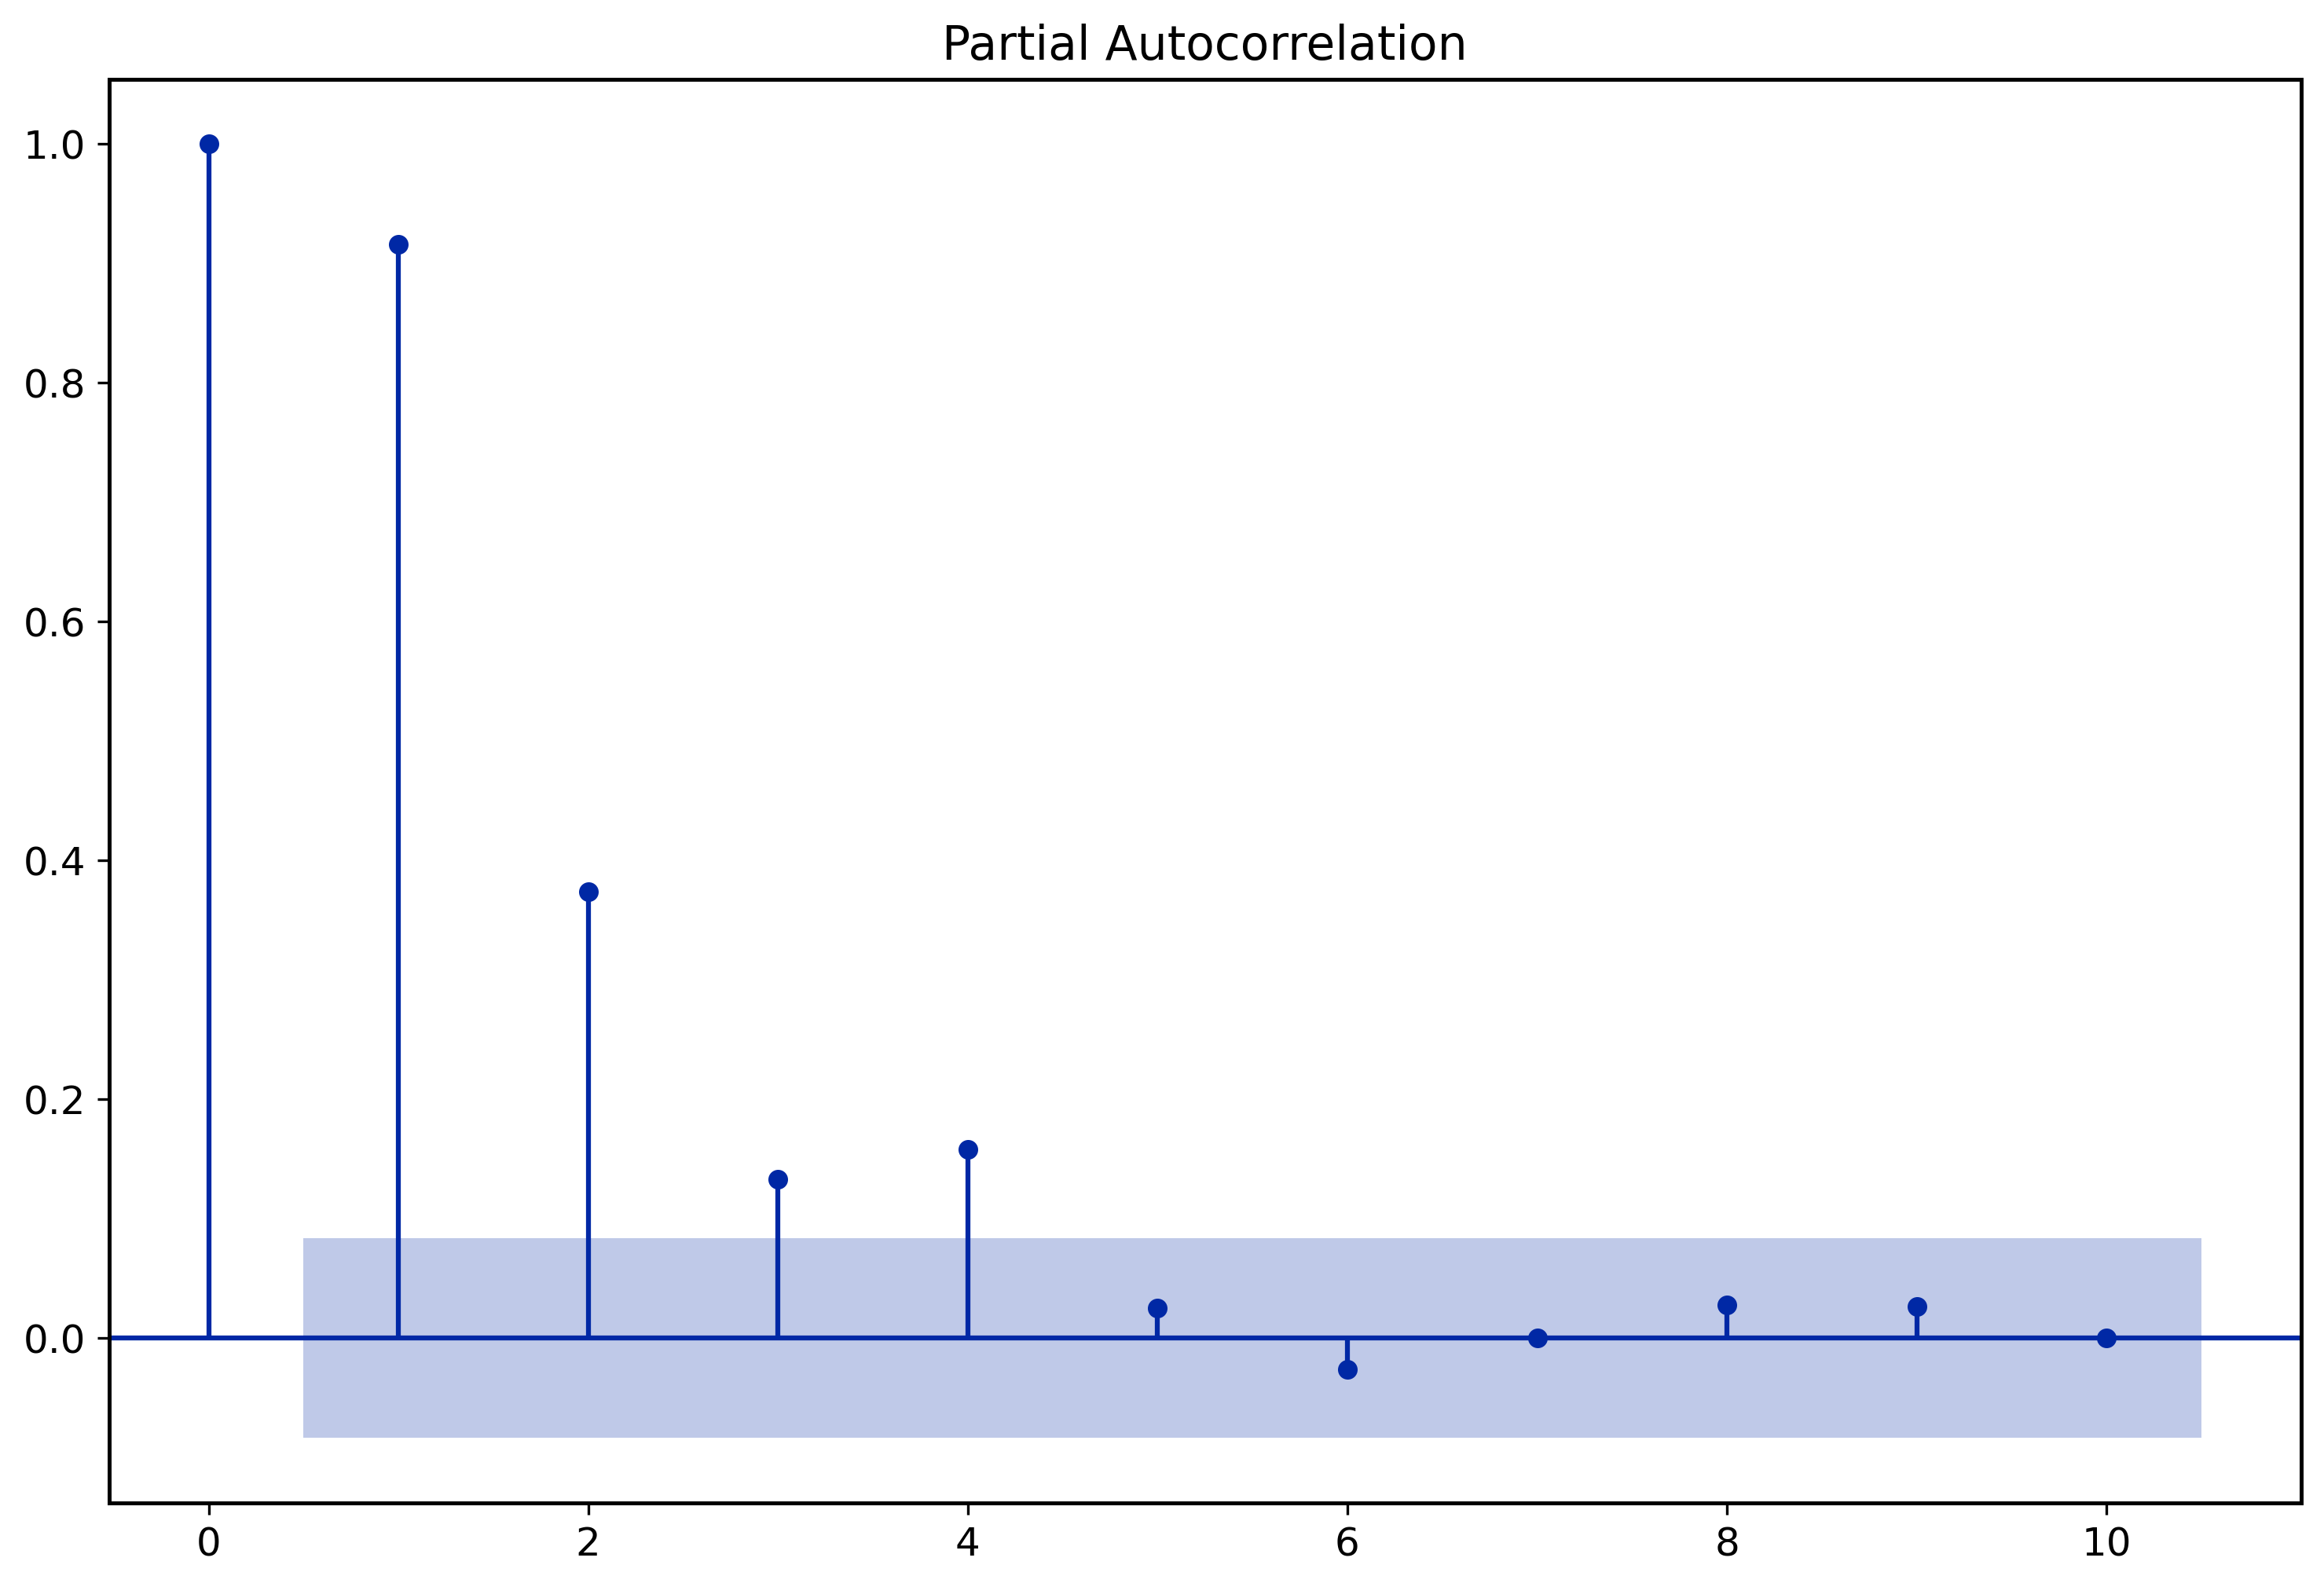

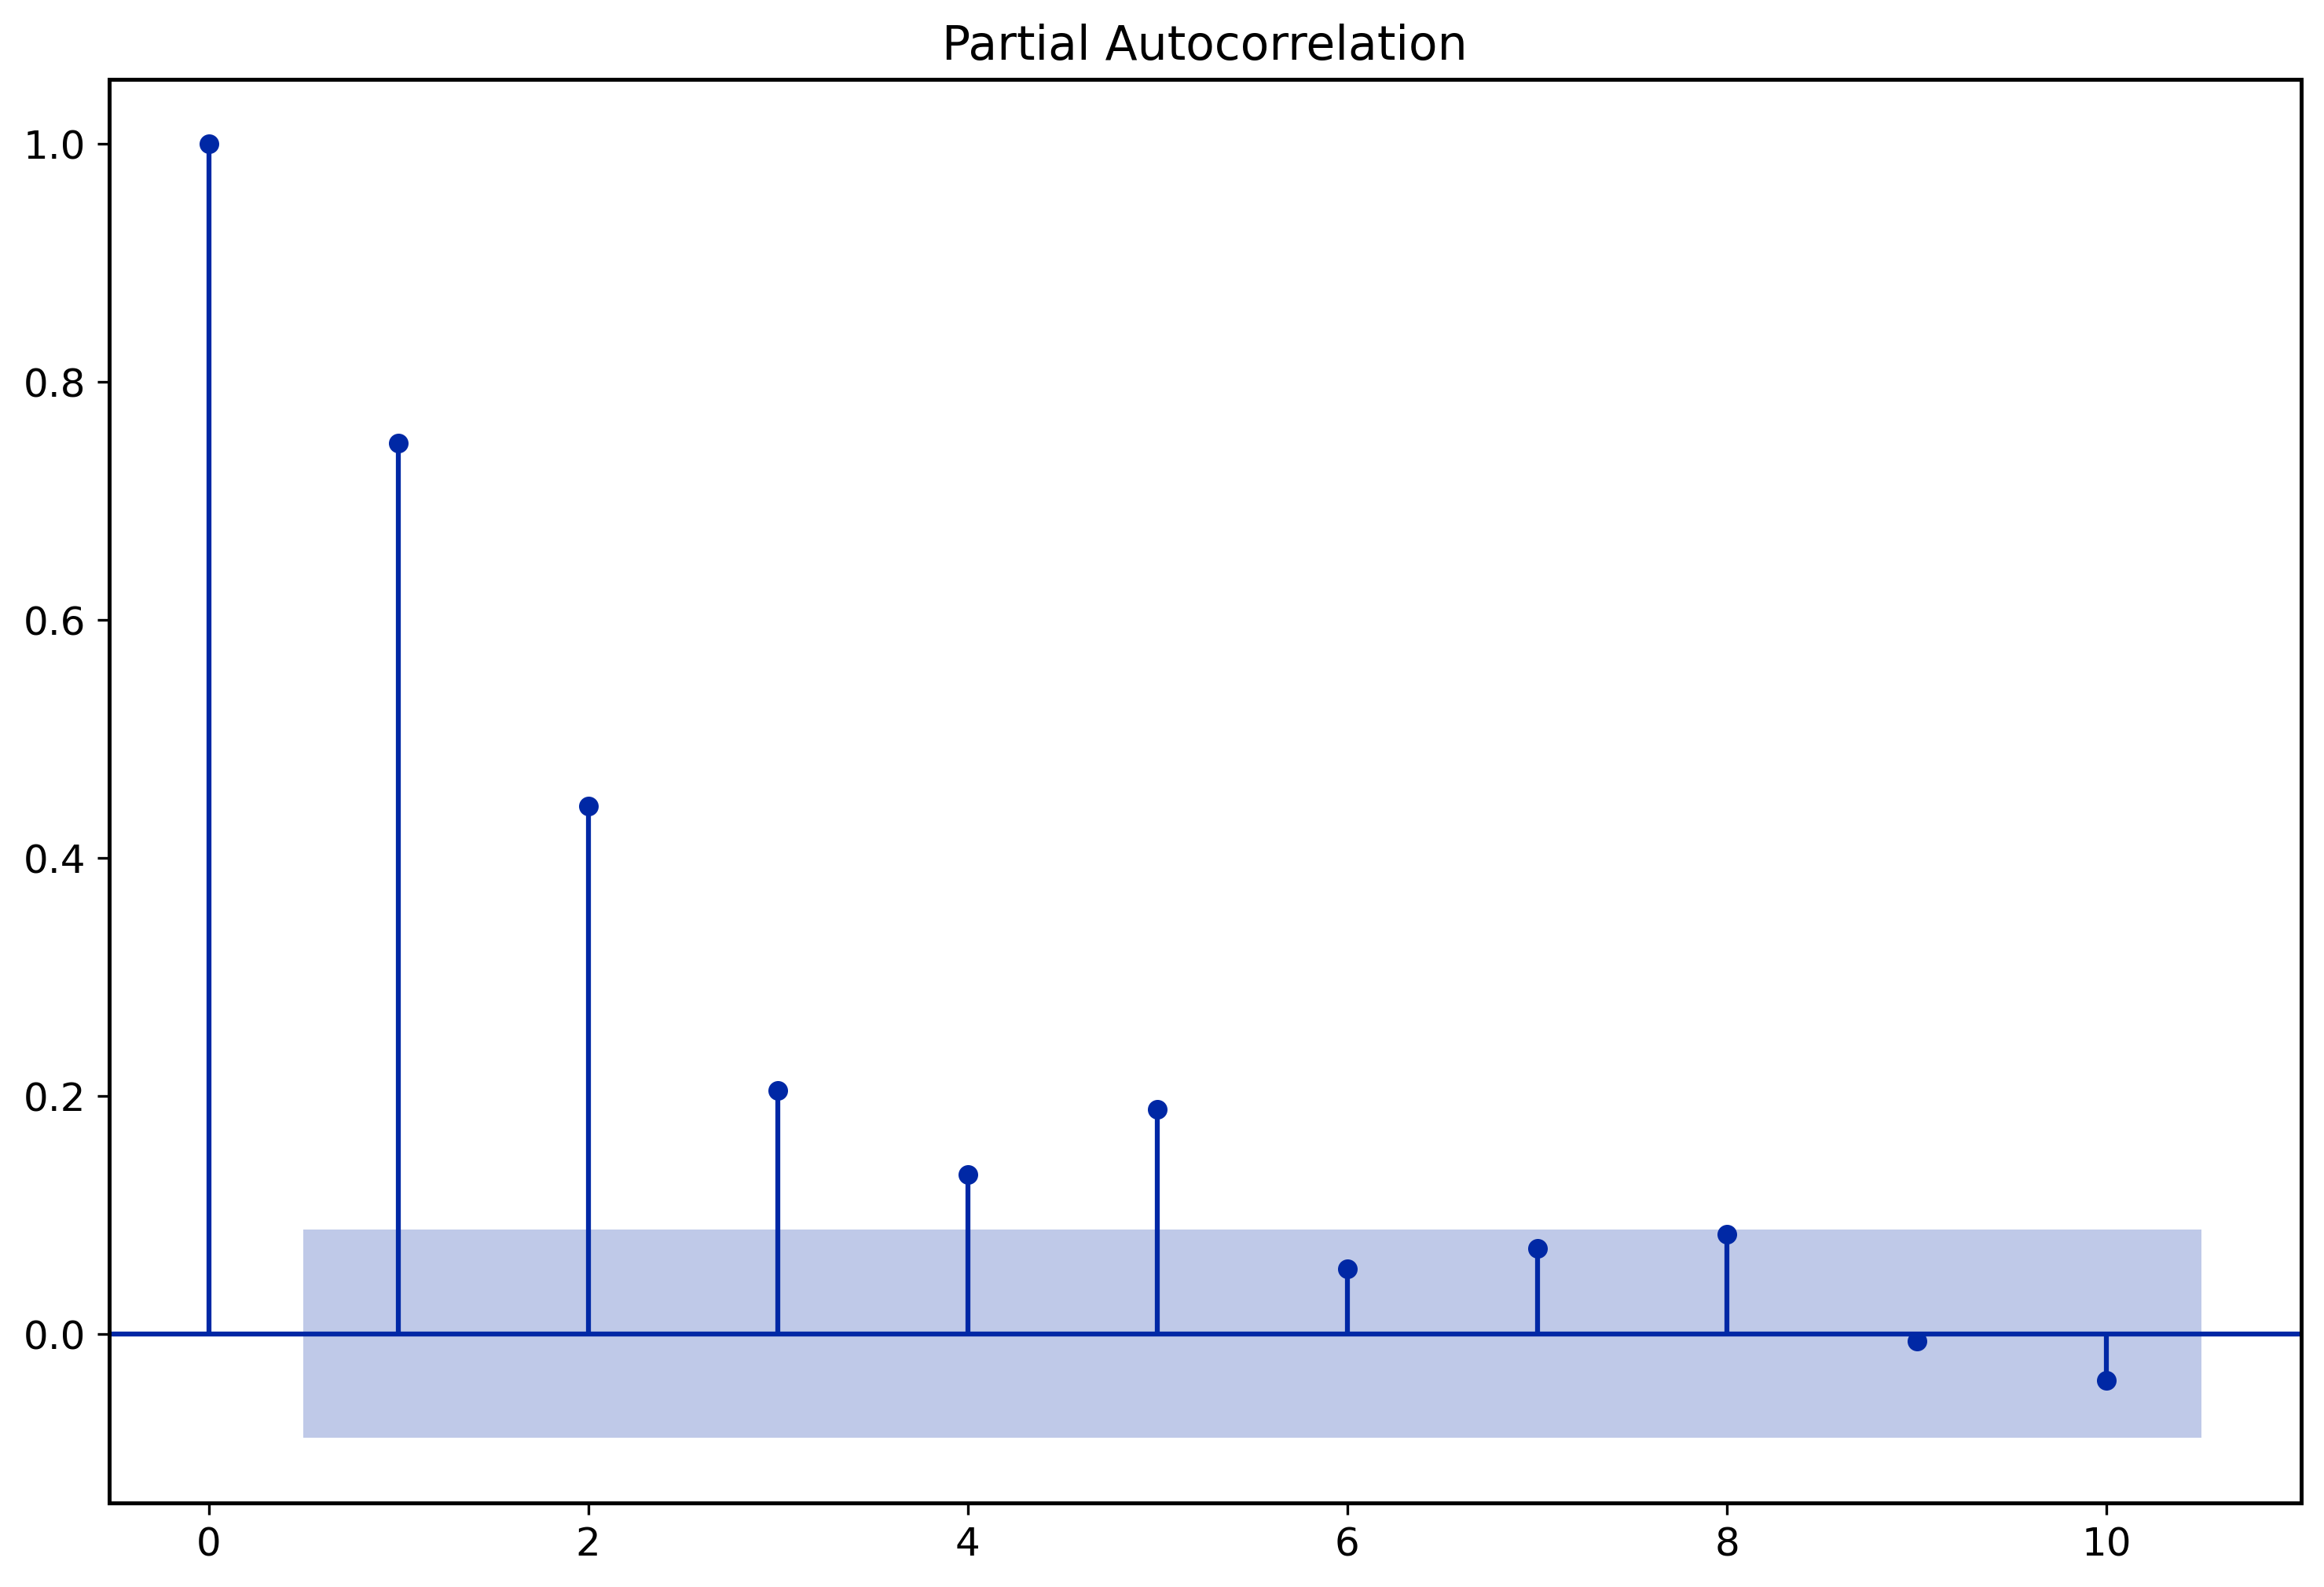

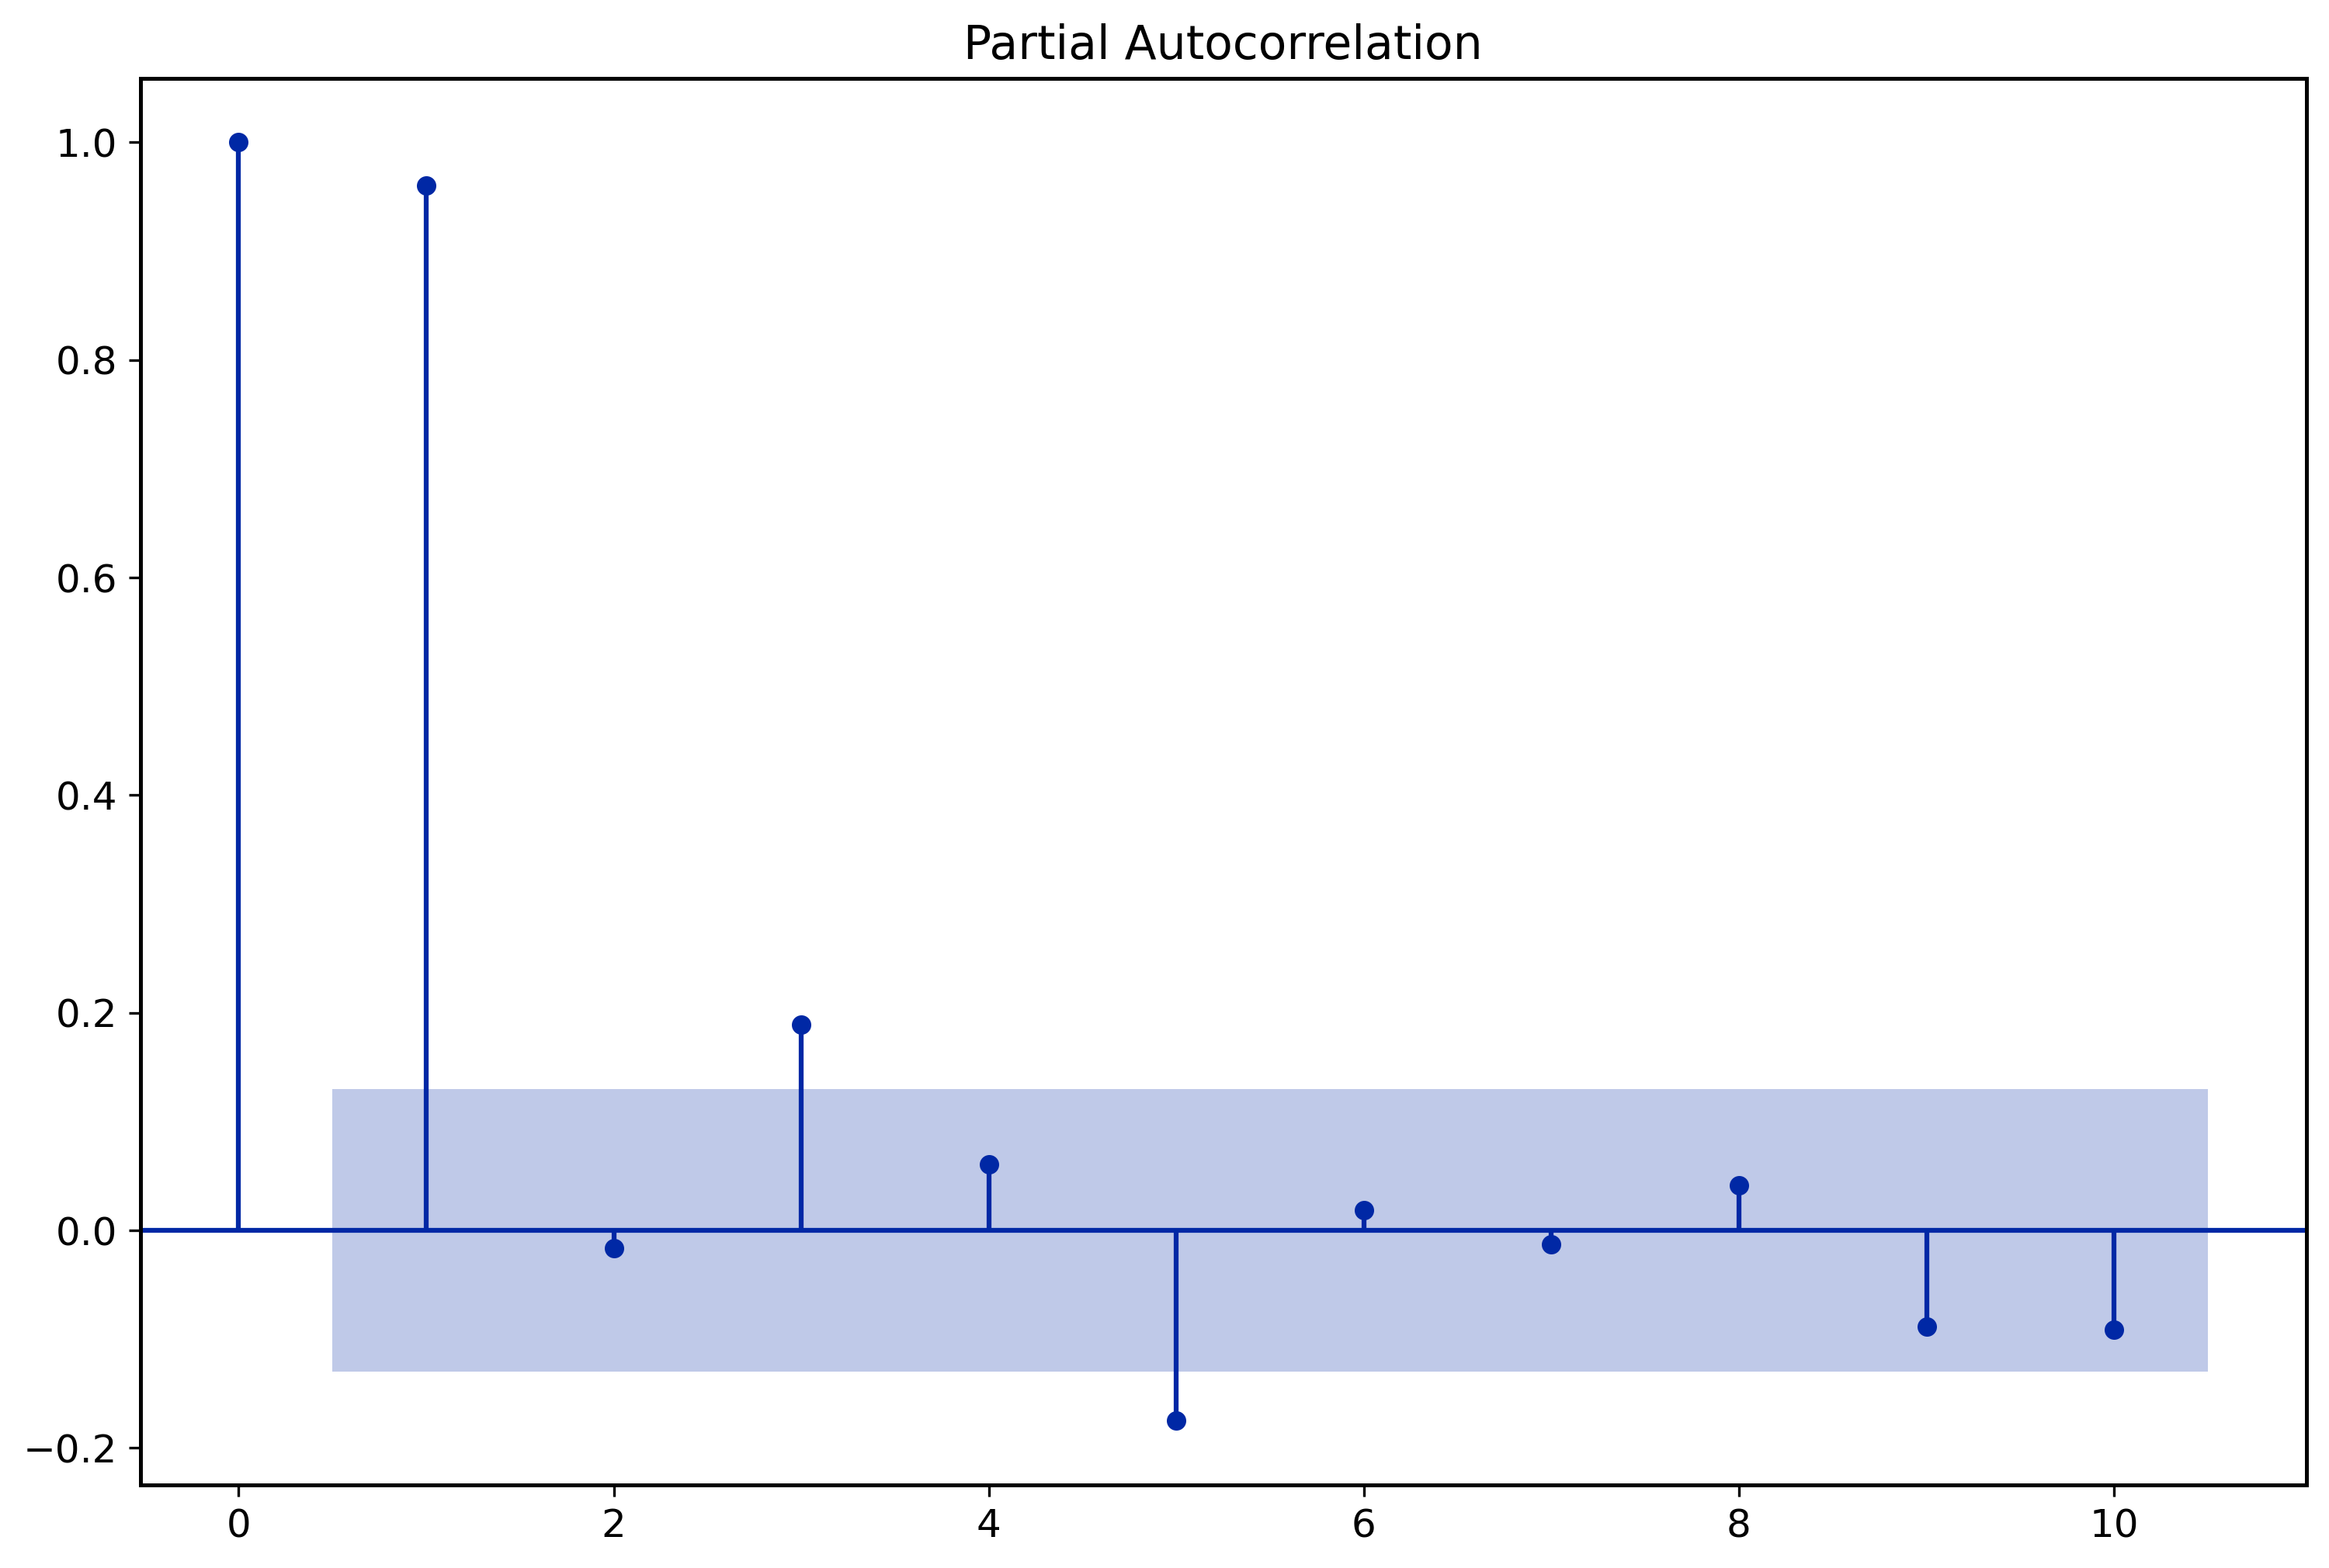

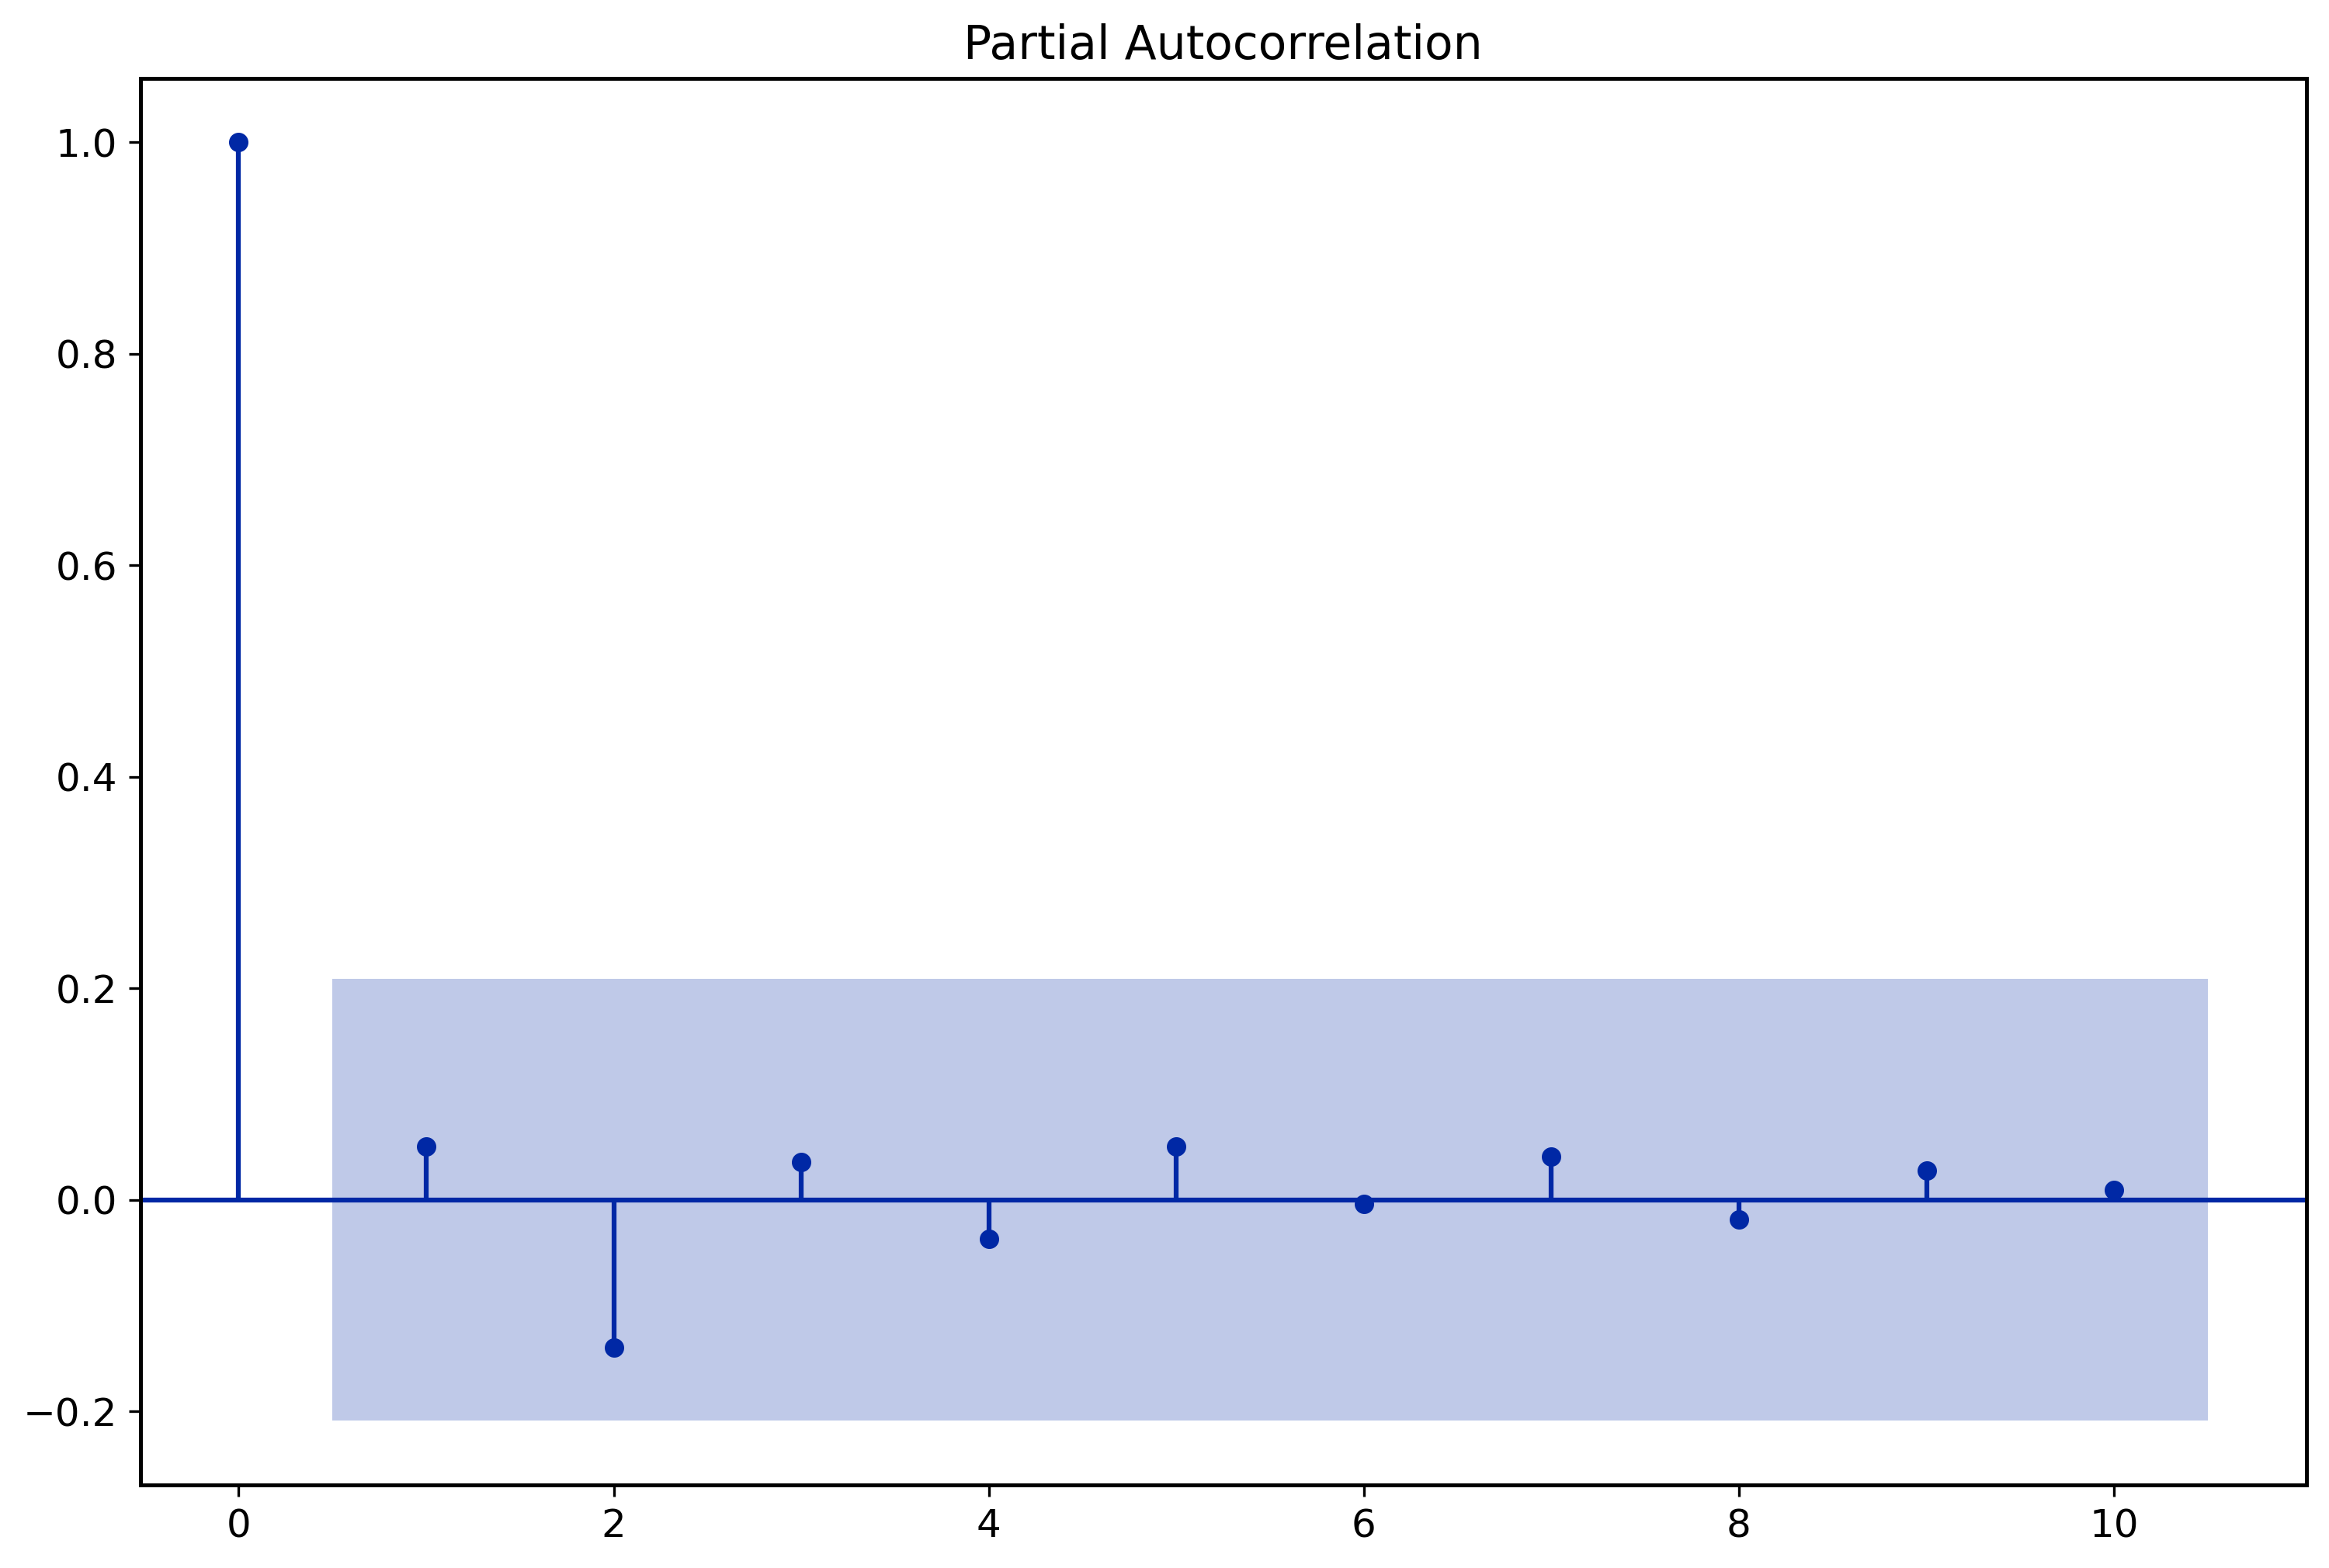

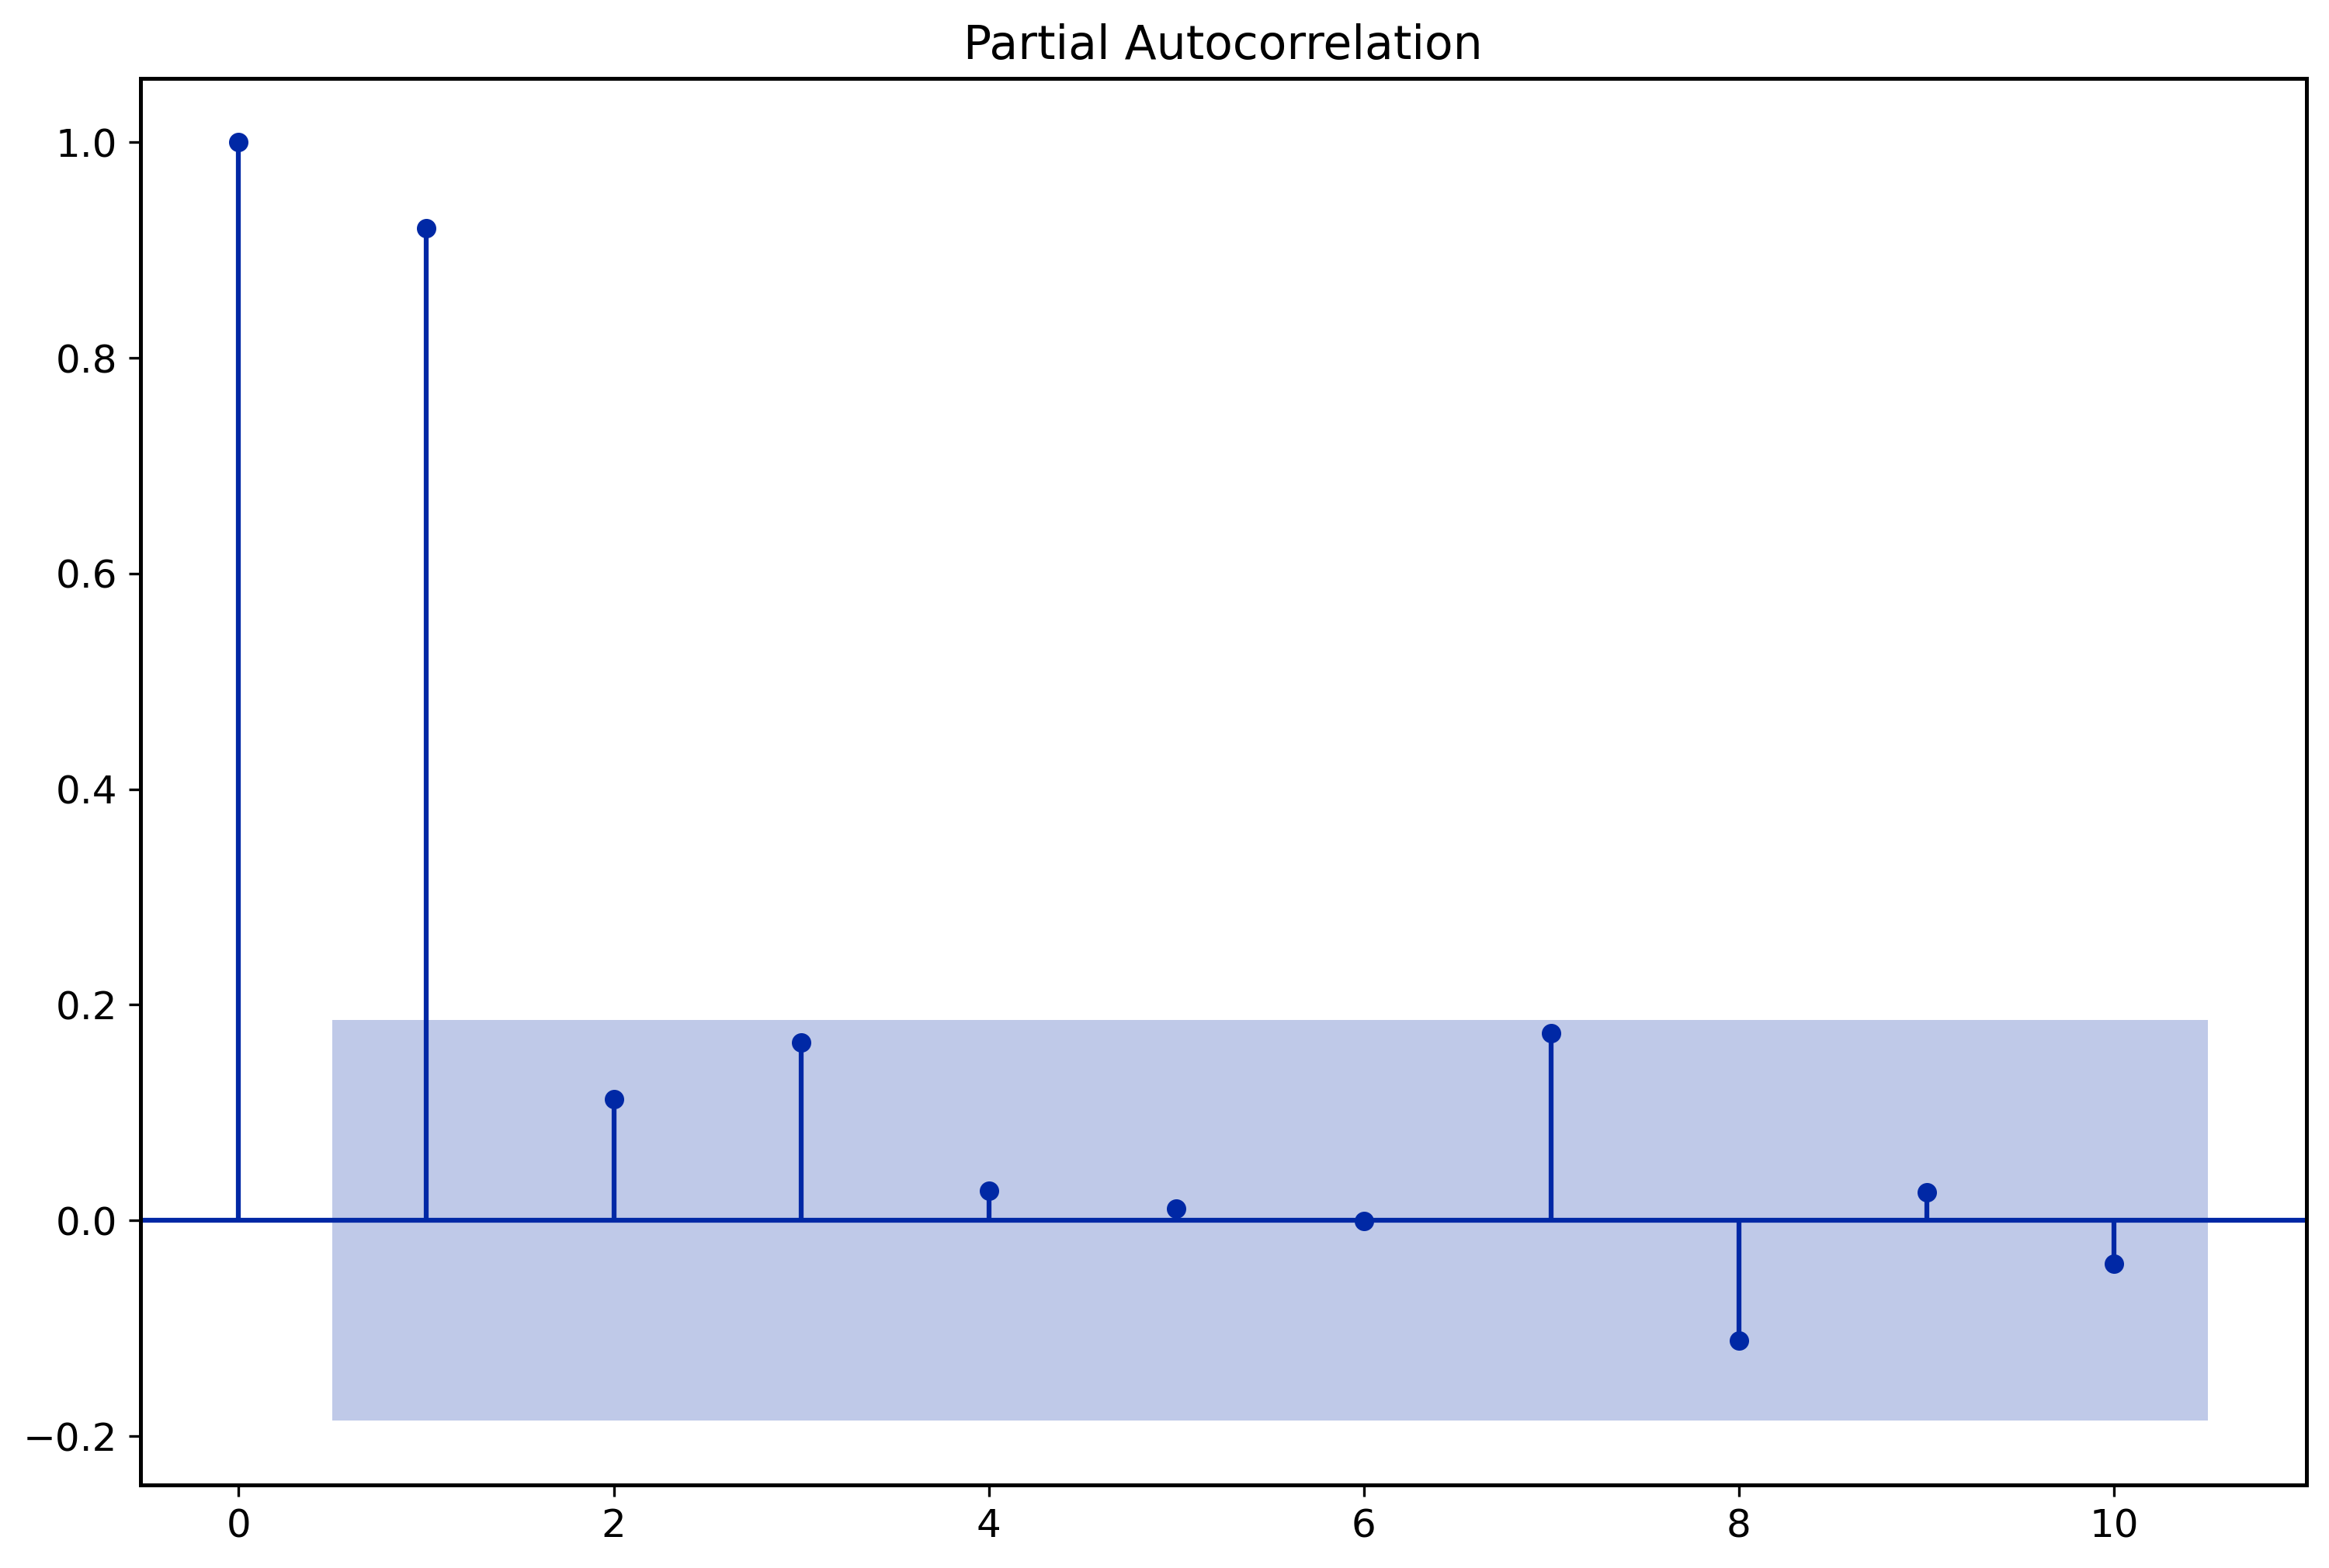

In [80]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
_df = adjusted_results.copy()
ret_diff = adjusted_results.copy()
ret_diff['daily']=_df['daily']-1

for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    ret_diff[col] =  ret_diff[ret_diff[col].notna()][col]-ret_diff['daily_accrued']
    plot_pacf(ret_diff[col].dropna(), lags=10)
    plt.show()


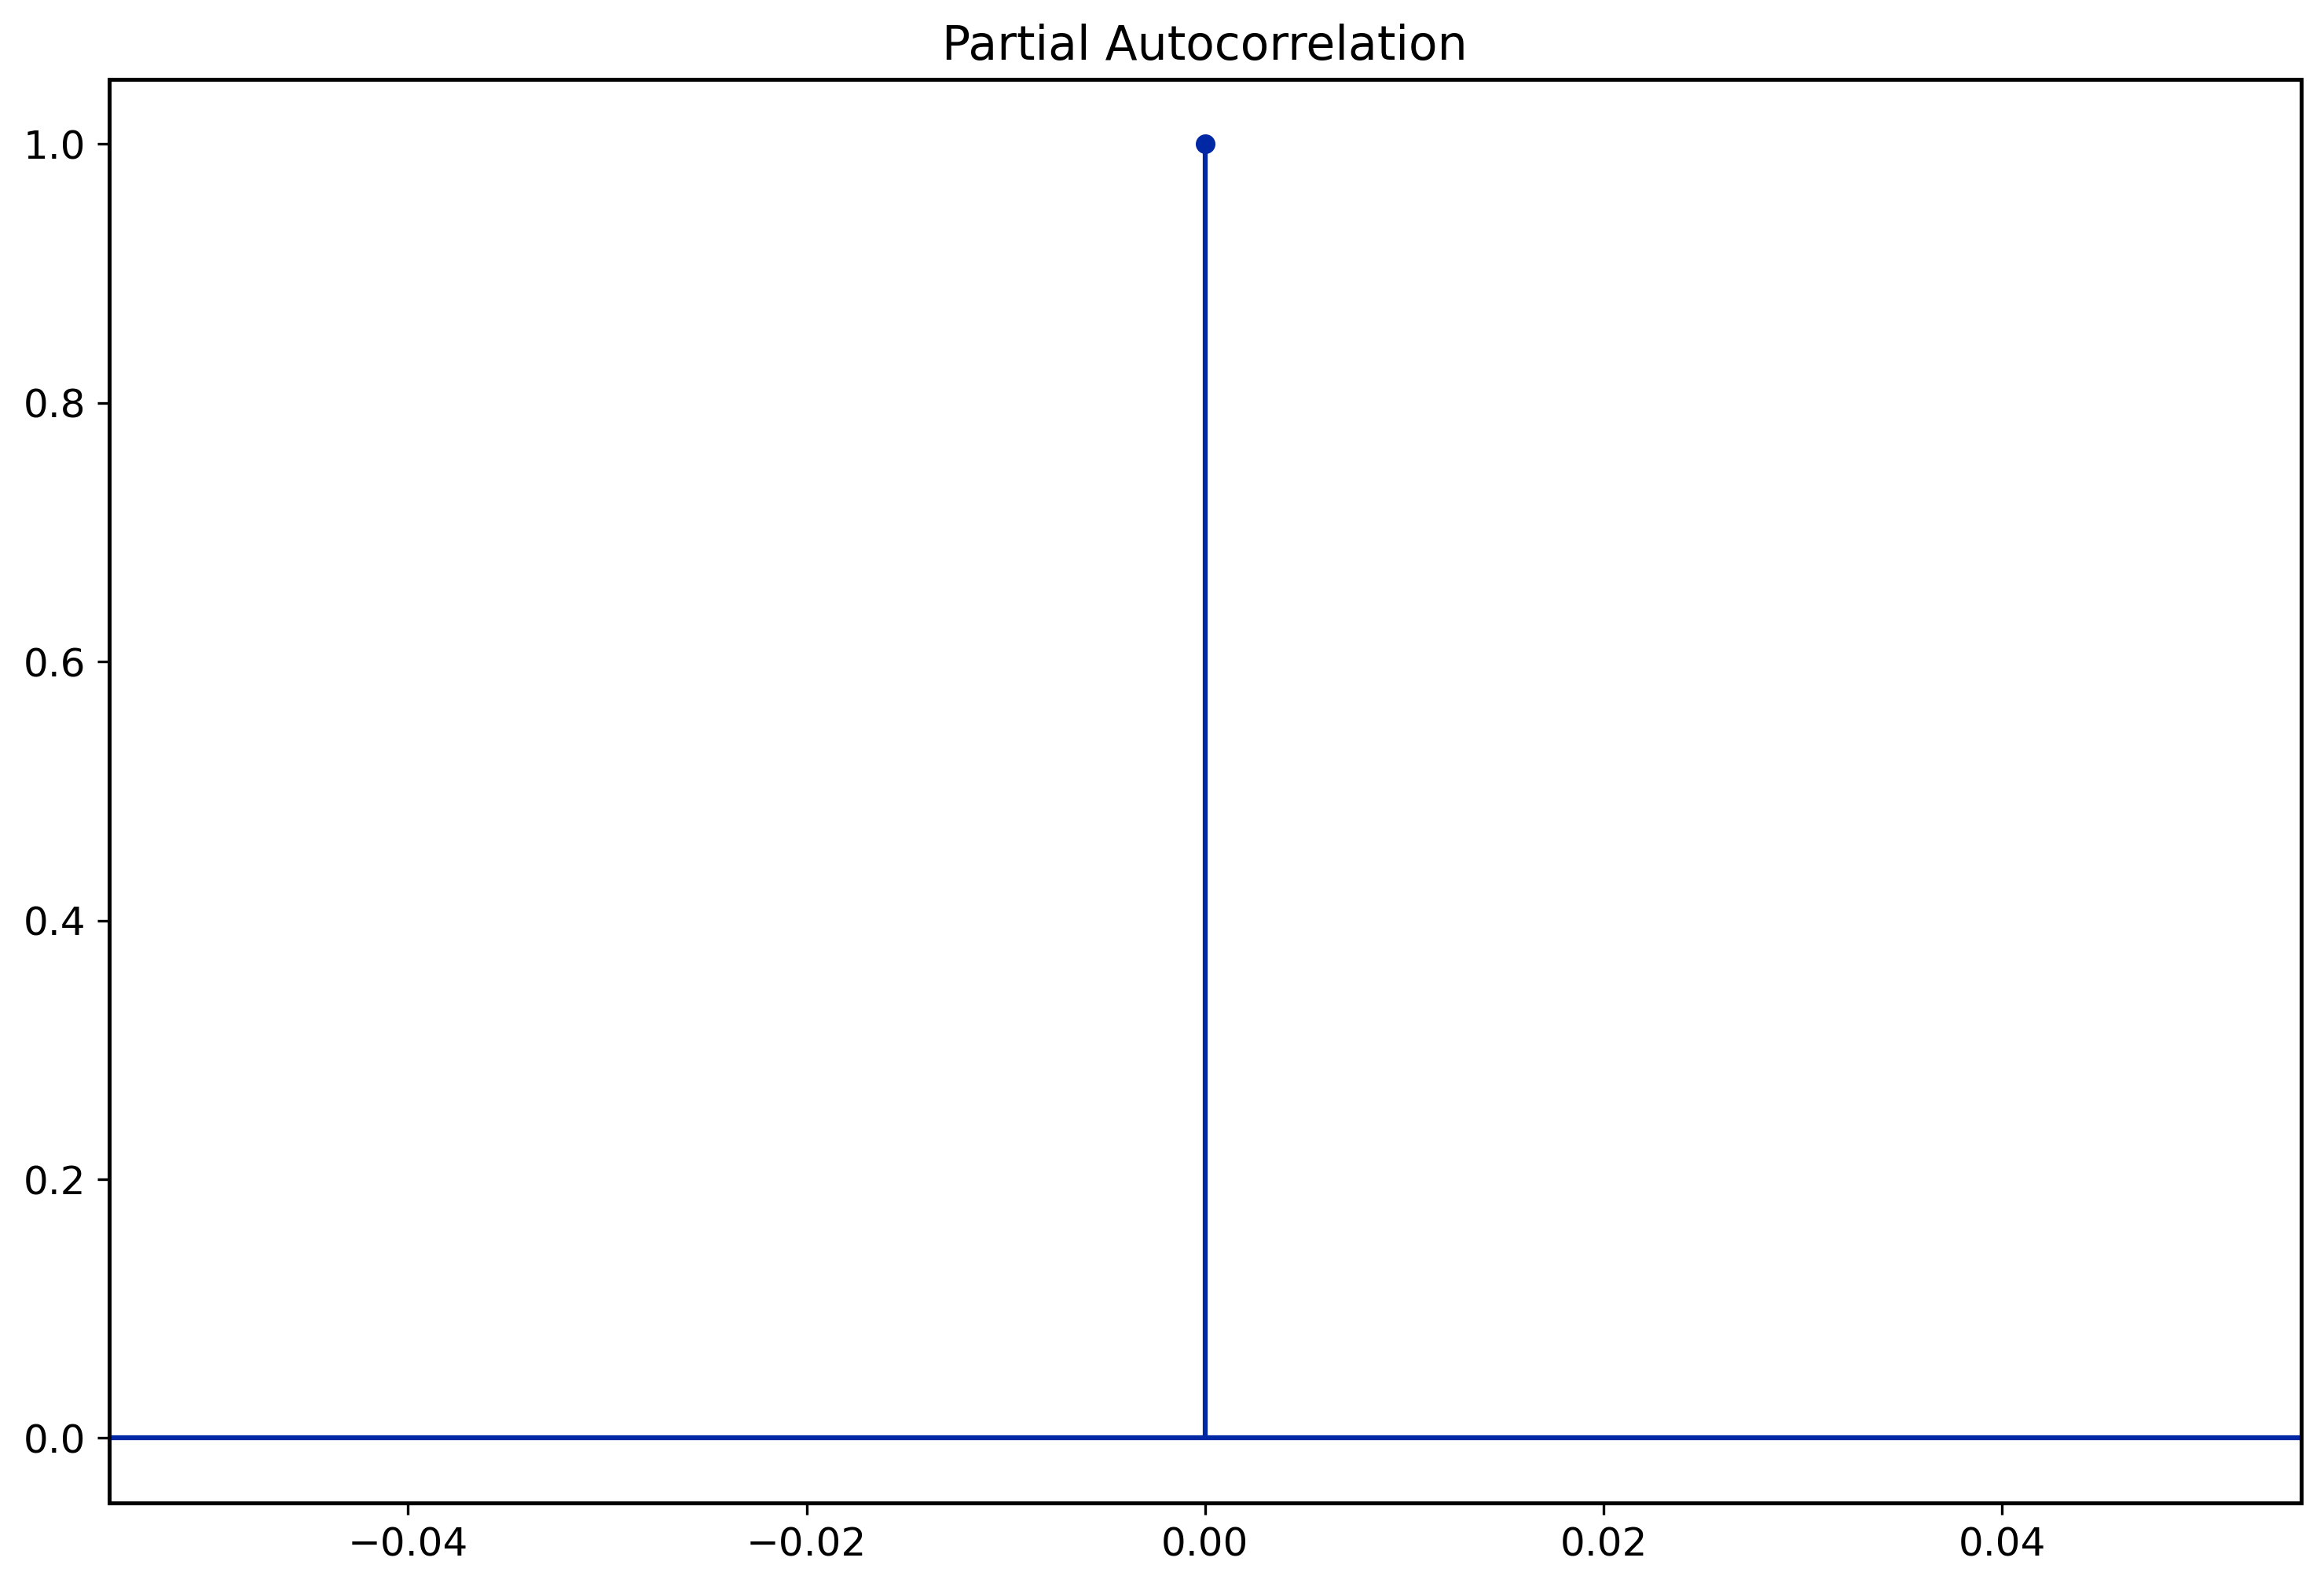

In [78]:
plot_pacf(ret_diff['rETH'], lags=10)
plt.show()


wstETH      rETH     cbETH   sfrxETH   ankrETH     daily  \
Date                                                                     
2021-10-07  0.000000       NaN       NaN       NaN       NaN  0.000151   
2021-10-08 -0.005052       NaN       NaN       NaN       NaN  0.000152   
2021-10-09 -0.004301       NaN       NaN       NaN       NaN  0.000151   
2021-10-10  0.007464       NaN       NaN       NaN       NaN  0.000150   
2021-10-11 -0.017937       NaN       NaN       NaN       NaN  0.000151   
...              ...       ...       ...       ...       ...       ...   
2023-04-03 -0.013960 -0.011445  0.026556  0.004102  0.079862  0.000130   
2023-04-04 -0.008914 -0.006358  0.027723  0.005017  0.086376  0.000125   
2023-04-05 -0.014489 -0.016741  0.026513  0.004014  0.074990  0.000119   
2023-04-06 -0.010816 -0.015037  0.027735  0.004129  0.087382  0.000119   
2023-04-07 -0.008614 -0.004170  0.032371  0.014264  0.095329  0.000118   

            daily_accrued  
Date                       
2021-10-07       1.000151  
2021-10-08       1.000303  
2021-10-09       1.000454  
2021-10-10       1.000604  
2021-10-11       1.000756  
...                   ...  
2023-04-03       1.076567  
2023-04-04       1.076701  
2023-04-05       1.076829  
2023-04-06       1.076957  
2023-04-07       1.077084  

[548 rows x 7 columns]

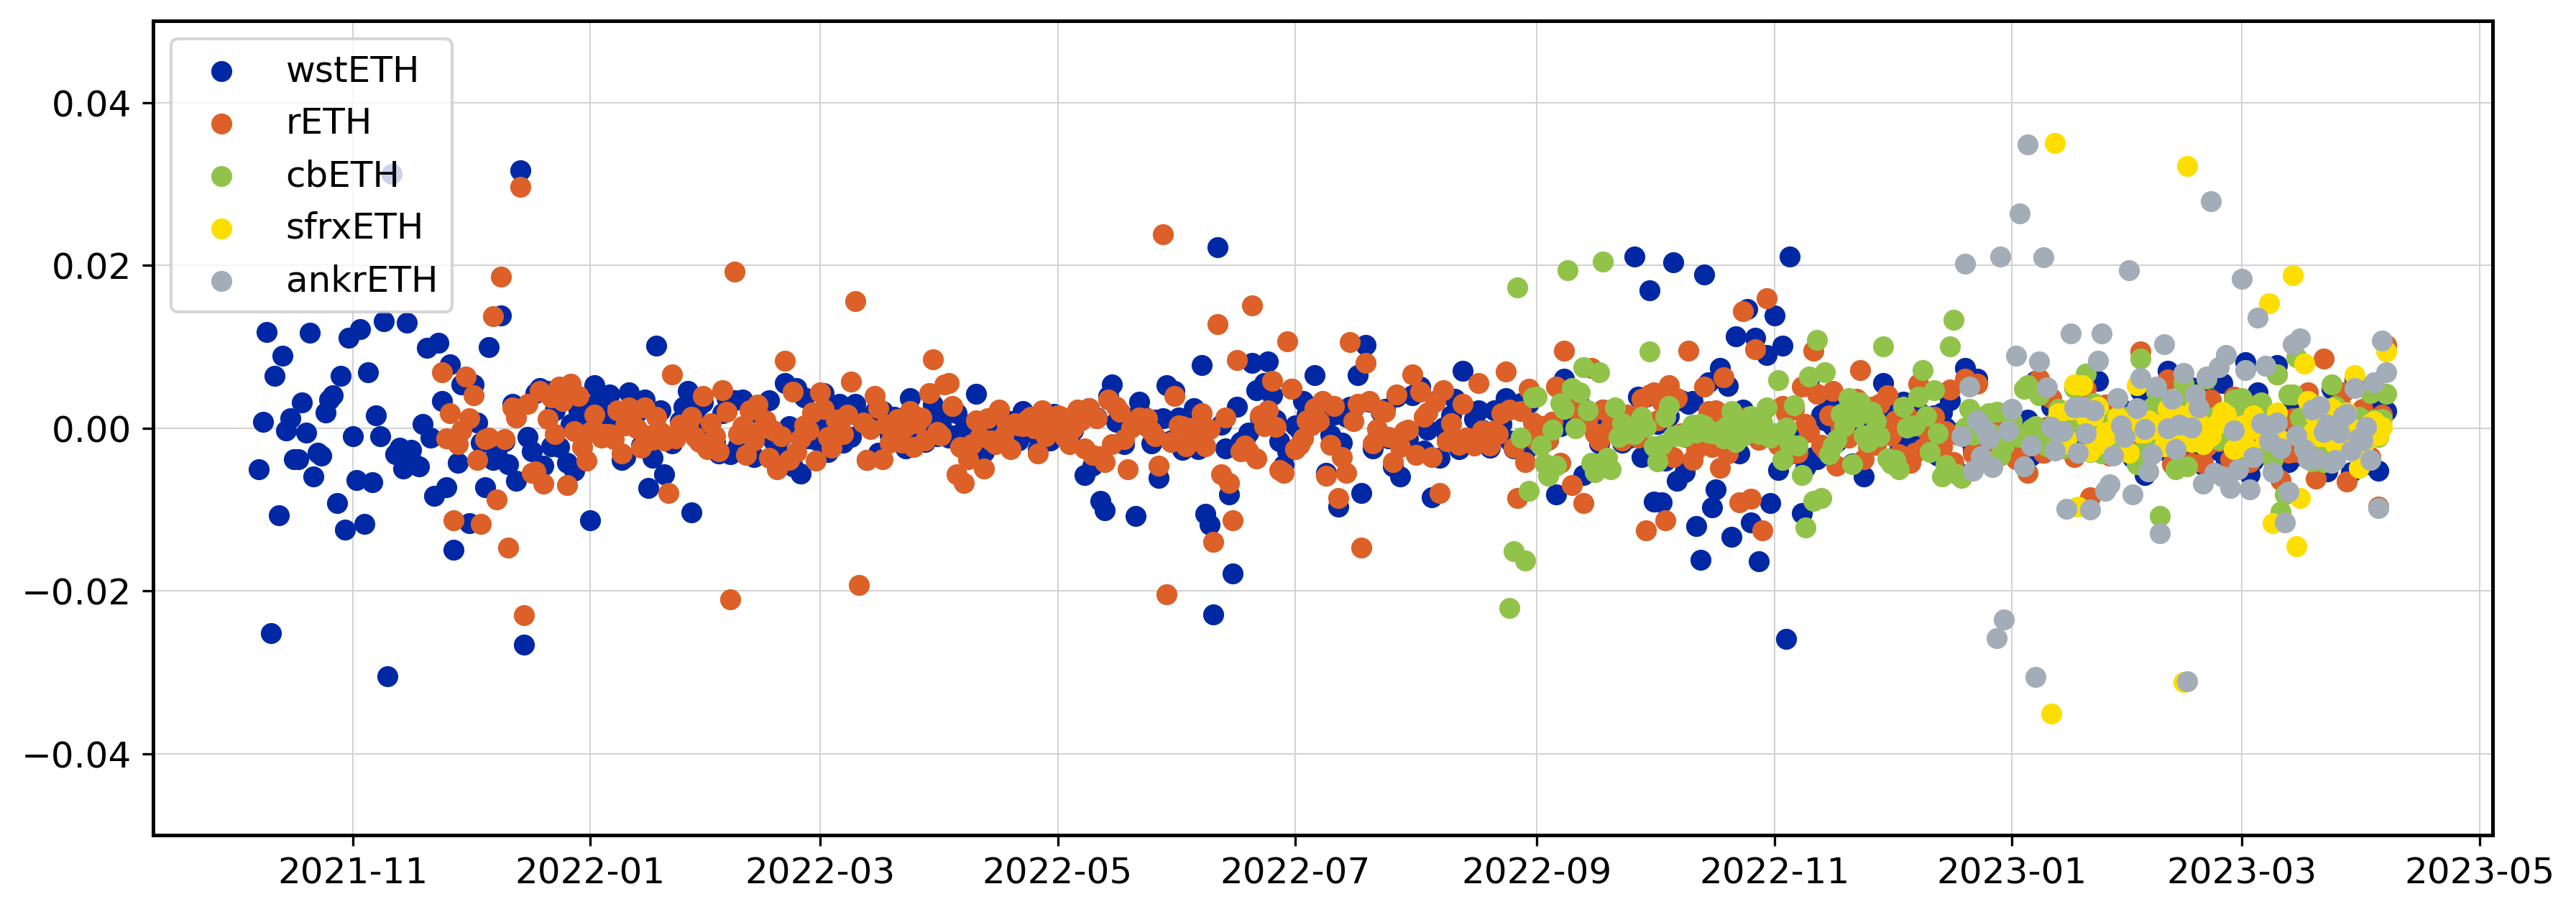

In [34]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = excess_returns
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.scatter(data_to_plot[col].index, data_to_plot[col], lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.set_ylim(-0.05,0.05)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

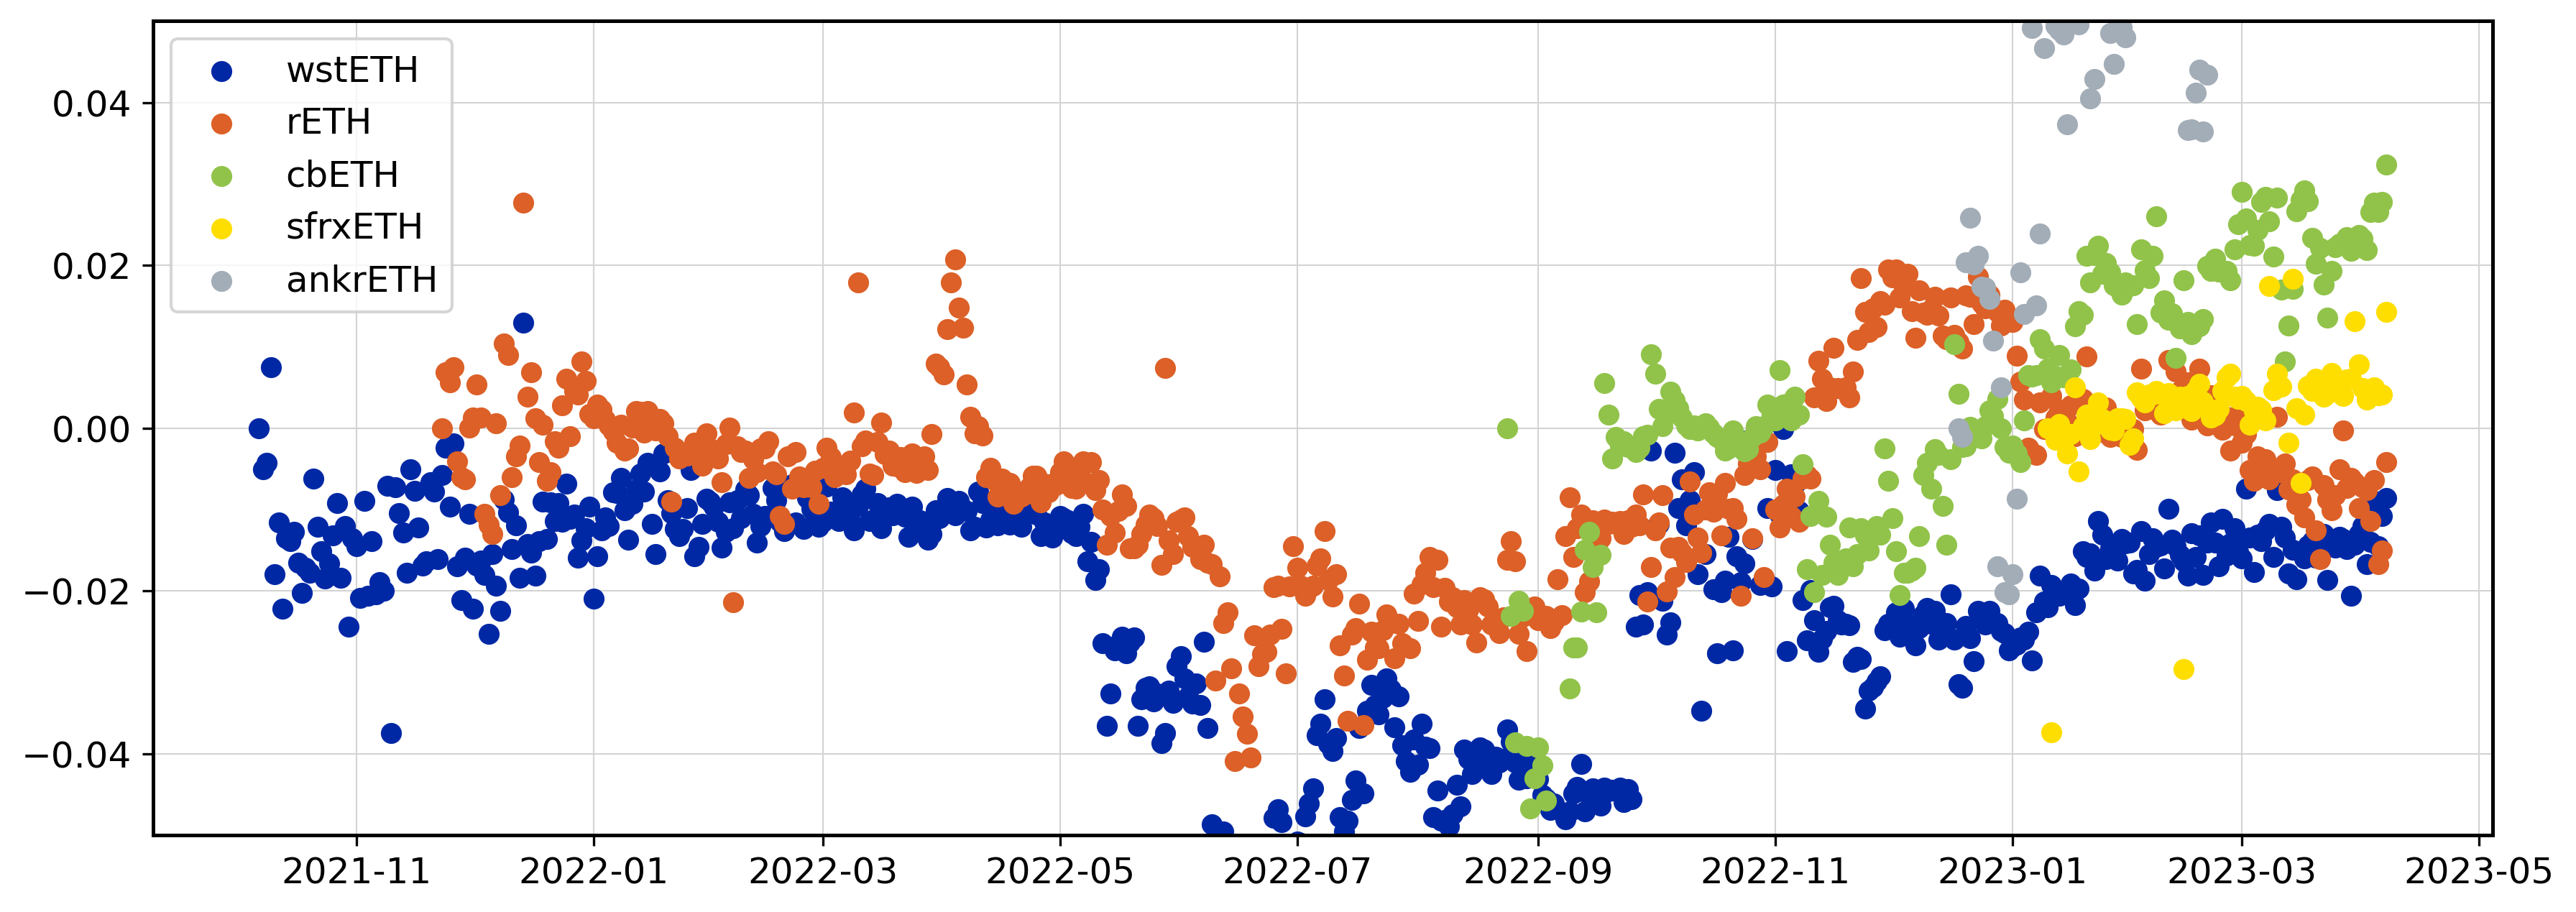

In [53]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = ret_diff
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(14,5),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    ax.scatter(data_to_plot[col].index, data_to_plot[col], lw=1, label = col)

#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
ax.set_ylim(-0.05,0.05)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [35]:
excess_returns.describe()

wstETH        rETH       cbETH    sfrxETH     ankrETH       daily  \
count  547.000000  500.000000  226.000000  87.000000  110.000000  548.000000   
mean     0.000003    0.000034    0.000143   0.000260    0.000821    0.000136   
std      0.005901    0.009201    0.004808   0.014792    0.010002    0.000013   
min     -0.030461   -0.118650   -0.022145  -0.080017   -0.031123    0.000112   
25%     -0.002449   -0.002144   -0.001716  -0.001274   -0.003789    0.000125   
50%     -0.000087   -0.000129    0.000062  -0.000018   -0.000090    0.000135   
75%      0.002394    0.002134    0.002065   0.001592    0.005062    0.000145   
max      0.031622    0.125663    0.020450   0.079990    0.034847    0.000211   

       daily_accrued  
count     548.000000  
mean        1.038631  
std         0.021910  
min         1.000151  
25%         1.020283  
50%         1.038283  
75%         1.057599  
max         1.077084

C:\Users\malte\AppData\Local\Temp/ipykernel_22224/2208906254.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
No handles with labels found to put in legend.


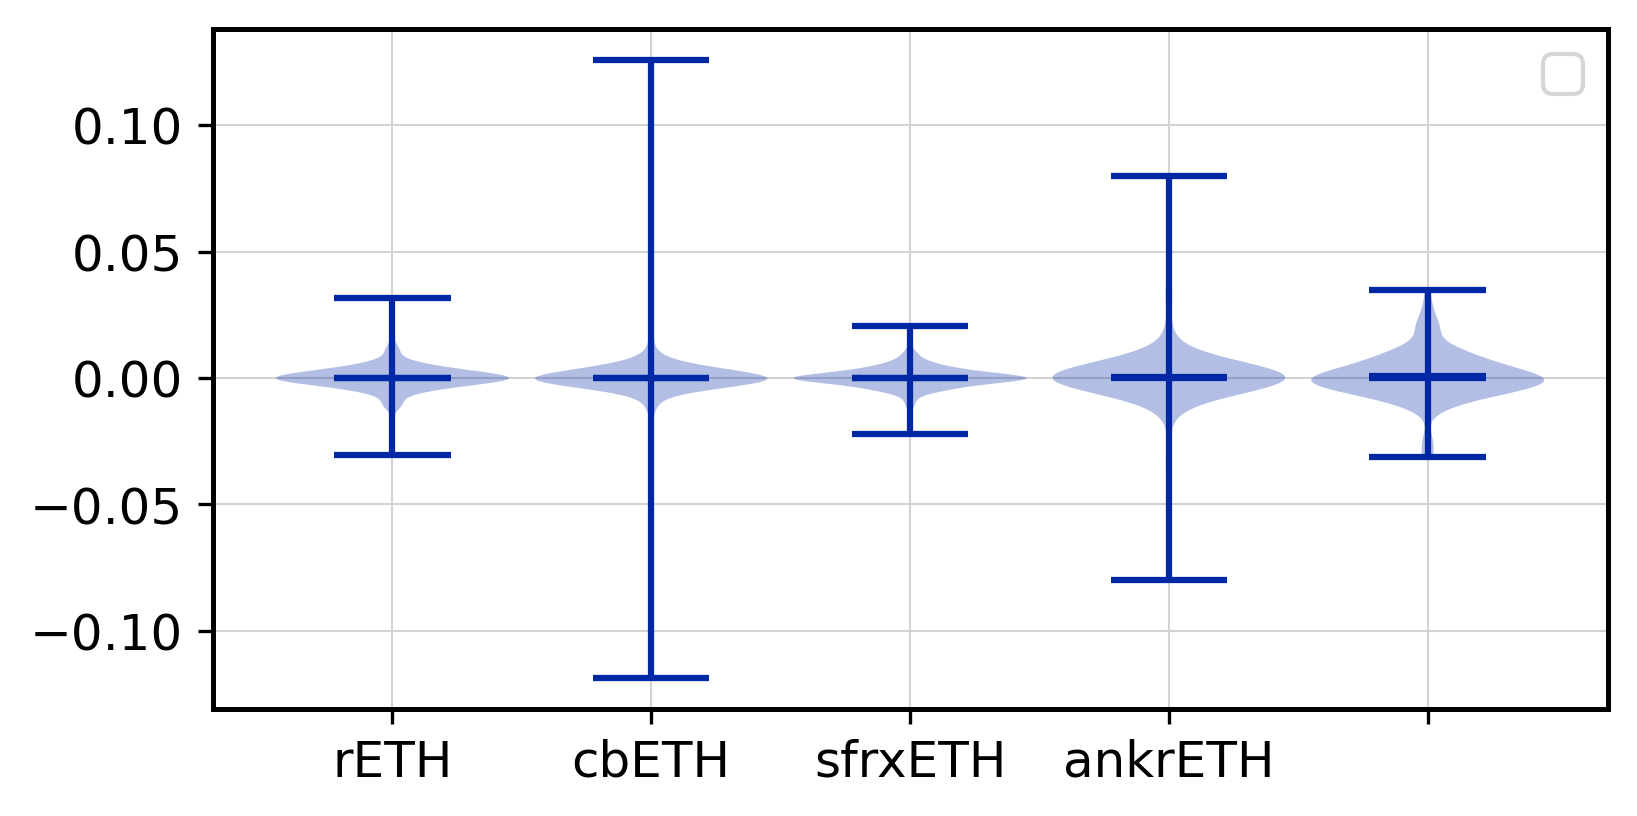

In [55]:
from scipy import signal
#detrended = signal.detrend(df['Number of Passengers'].values)


data_to_plot = excess_returns
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,3),dpi =300)

violin = []
labels = []
for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    violin.append(data_to_plot[data_to_plot[col].notna()][col].values)
    labels.append(col)

vplot = ax.violinplot(violin, positions=None, widths=0.9, showmeans=True, showextrema=True, showmedians=True, points=300, bw_method=None)
ax.set_xticklabels(labels)
#ax.plot(data_to_plot.index, data_to_plot['daily_accrued'], lw=1, ls='--', label='Effective Stake')

ax.set_axisbelow(True)
#ax.set_ylim(-0.05,0.05)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

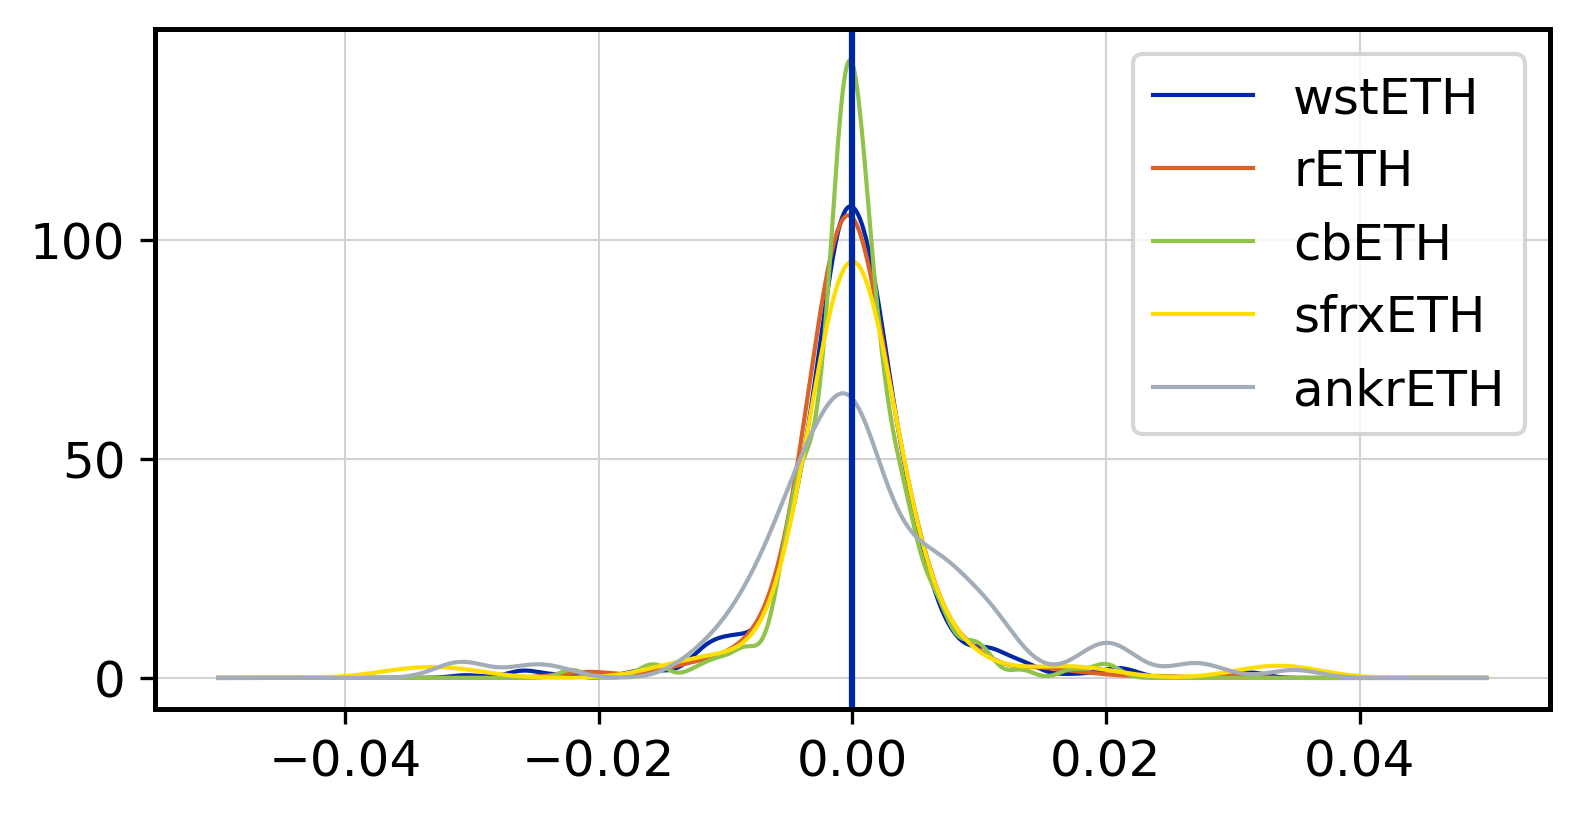

In [37]:
from scipy.stats import gaussian_kde


data_to_plot = excess_returns
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,3),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    d = data_to_plot[data_to_plot[col].notnull()][col].values
    density = gaussian_kde(d)

    density.covariance_factor = lambda : 0.2
    density._compute_covariance()
    x = np.linspace(-0.05,0.05,1000)
    
    line = ax.plot(x,density(x),lw=1, label=col)
    #ax.fill_between(x,0,density(x), alpha = 0.1, color = line[0].get_color())

ax.axvline(0)
ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

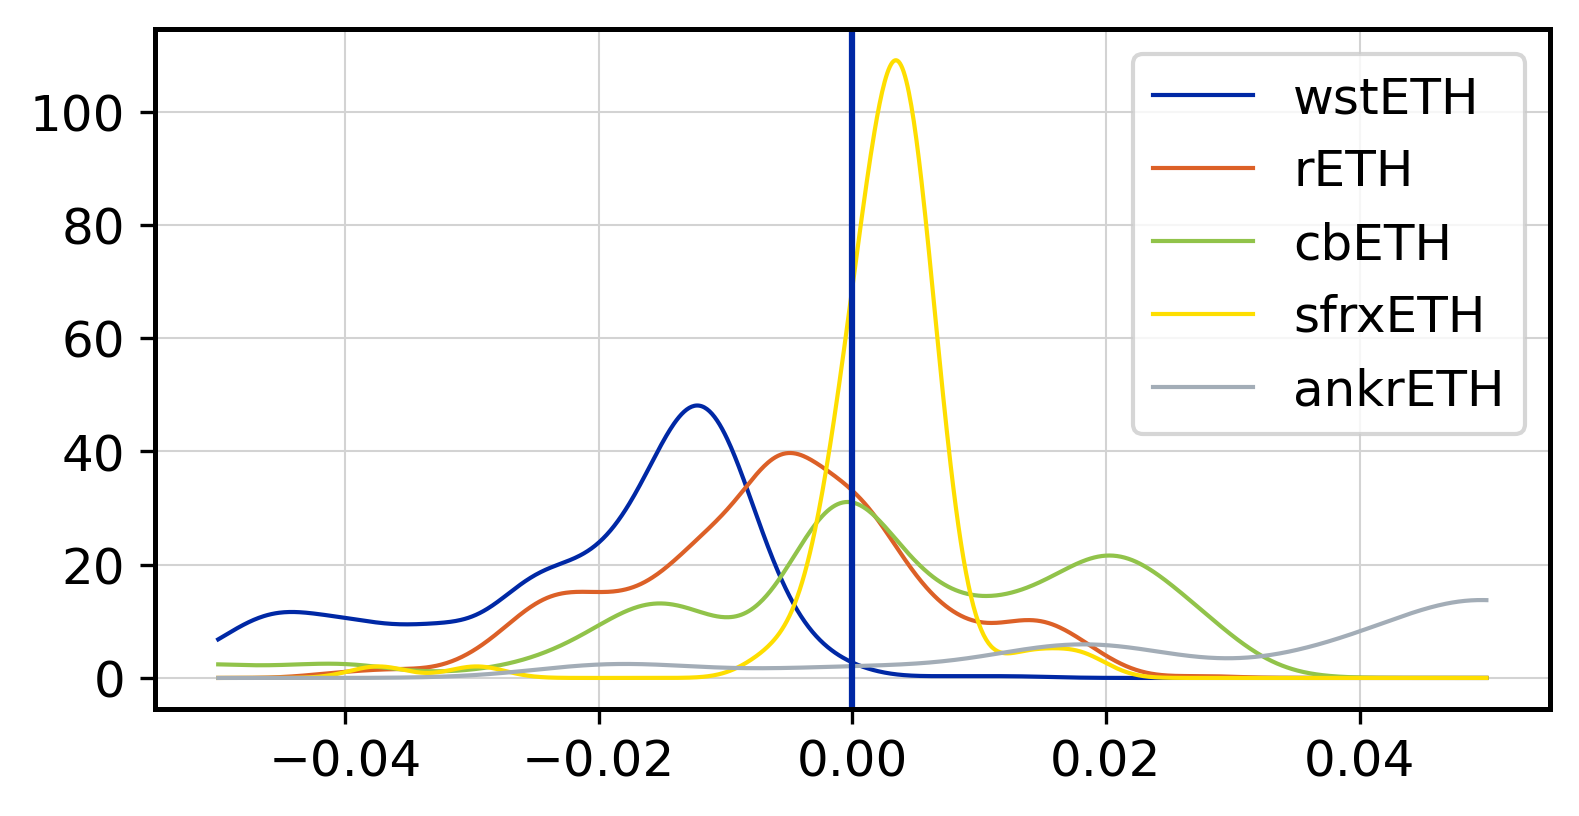

In [56]:
from scipy.stats import gaussian_kde


data_to_plot = ret_diff
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,3),dpi =300)

for col in data_to_plot:
    if col in ['daily', 'daily_accrued']:
        continue
    d = data_to_plot[data_to_plot[col].notnull()][col].values
    density = gaussian_kde(d)

    density.covariance_factor = lambda : 0.2
    density._compute_covariance()
    x = np.linspace(-0.05,0.05,1000)
    
    line = ax.plot(x,density(x),lw=1, label=col)
    #ax.fill_between(x,0,density(x), alpha = 0.1, color = line[0].get_color())

ax.axvline(0)
ax.set_axisbelow(True)
ax.legend()
ax.grid(zorder=100, lw =0.5, color = 'lightgray')
fig.set_facecolor('w')

In [38]:
from scipy.stats import gaussian_kde
from matplotlib.ticker  import FormatStrFormatter
density_e = gaussian_kde(effective)
density_s = gaussian_kde(simulated)

xs = np.linspace(0,25,2000)
for d in [density_e, density_s]:   
    d.covariance_factor = lambda : 0.1
    d._compute_covariance()

NameError: name 'effective' is not defined

In [61]:
data_reg = pd.concat([excess_returns, interest.daily_eth_change, interest.monthly_ETH_std, np.log(interest.market_cap), np.log(interest.volume)], axis=1, join="inner")
#for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
#    data_reg[col] = adjusted_results[col].pct_change(1)
data_reg

wstETH      rETH     cbETH   sfrxETH   ankrETH     daily  \
Date                                                                     
2021-10-07       NaN       NaN       NaN       NaN       NaN  0.000151   
2021-10-08 -0.005052       NaN       NaN       NaN       NaN  0.000152   
2021-10-09  0.000756       NaN       NaN       NaN       NaN  0.000151   
2021-10-10  0.011811       NaN       NaN       NaN       NaN  0.000150   
2021-10-11 -0.025199       NaN       NaN       NaN       NaN  0.000151   
...              ...       ...       ...       ...       ...       ...   
2023-04-03  0.002646 -0.003548  0.004250  0.000578 -0.003893  0.000130   
2023-04-04  0.004751  0.004777  0.001055  0.000846  0.005625  0.000125   
2023-04-05 -0.005220 -0.009699 -0.001099 -0.000928 -0.009798  0.000119   
2023-04-06  0.003458  0.001609  0.001105  0.000107  0.010750  0.000119   
2023-04-07  0.002067  0.010235  0.004194  0.009374  0.006816  0.000118   

            daily_accrued  daily_eth_change  monthly_ETH_std  market_cap  \
Date                                                                       
2021-10-07       1.000151          0.002070         0.050385   26.771961   
2021-10-08       1.000303         -0.006749         0.050297   26.772080   
2021-10-09       1.000454          0.003355         0.050128   26.763326   
2021-10-10       1.000604         -0.041912         0.049318   26.767883   
2021-10-11       1.000756          0.034882         0.049584   26.726573   
...                   ...               ...              ...         ...   
2023-04-03       1.076567          0.008124         0.032198   26.100830   
2023-04-04       1.076701          0.033535         0.032575   26.110048   
2023-04-05       1.076829          0.020368         0.032659   26.140512   
2023-04-06       1.076957         -0.018957         0.032953   26.162953   
2023-04-07       1.077084         -0.003890         0.032694   26.141806   

               volume  
Date                   
2021-10-07  23.672447  
2021-10-08  23.509636  
2021-10-09  23.265422  
2021-10-10  23.506532  
2021-10-11  23.645308  
...               ...  
2023-04-03  22.989584  
2023-04-04  23.064910  
2023-04-05  23.057275  
2023-04-06  22.835077  
2023-04-07  22.846261  

[548 rows x 11 columns]

In [82]:
data_auto_reg = pd.concat([ret_diff, interest.daily_eth_change, interest.monthly_ETH_std, np.log(interest.market_cap), np.log(interest.volume)], axis=1, join="inner")
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    data_auto_reg['shift1_'+str(col)] = data_auto_reg[col].shift(1)
    data_auto_reg['shift2_'+str(col)] = data_auto_reg[col].shift(2)
    data_auto_reg['shift3_'+str(col)] = data_auto_reg[col].shift(3)
    data_auto_reg['shift4_'+str(col)] = data_auto_reg[col].shift(4)
    data_auto_reg['shift5_'+str(col)] = data_auto_reg[col].shift(5)
    data_auto_reg['shift6_'+str(col)] = data_auto_reg[col].shift(6)
data_auto_reg

wstETH      rETH     cbETH   sfrxETH   ankrETH     daily  \
Date                                                                     
2021-10-07  0.000000       NaN       NaN       NaN       NaN  0.000151   
2021-10-08 -0.005052       NaN       NaN       NaN       NaN  0.000152   
2021-10-09 -0.004301       NaN       NaN       NaN       NaN  0.000151   
2021-10-10  0.007464       NaN       NaN       NaN       NaN  0.000150   
2021-10-11 -0.017937       NaN       NaN       NaN       NaN  0.000151   
...              ...       ...       ...       ...       ...       ...   
2023-04-03 -0.013960 -0.011445  0.026556  0.004102  0.079862  0.000130   
2023-04-04 -0.008914 -0.006358  0.027723  0.005017  0.086376  0.000125   
2023-04-05 -0.014489 -0.016741  0.026513  0.004014  0.074990  0.000119   
2023-04-06 -0.010816 -0.015037  0.027735  0.004129  0.087382  0.000119   
2023-04-07 -0.008614 -0.004170  0.032371  0.014264  0.095329  0.000118   

            daily_accrued  daily_eth_change  monthly_ETH_std  market_cap  ...  \
Date                                                                      ...   
2021-10-07       1.000151          0.002070         0.050385   26.771961  ...   
2021-10-08       1.000303         -0.006749         0.050297   26.772080  ...   
2021-10-09       1.000454          0.003355         0.050128   26.763326  ...   
2021-10-10       1.000604         -0.041912         0.049318   26.767883  ...   
2021-10-11       1.000756          0.034882         0.049584   26.726573  ...   
...                   ...               ...              ...         ...  ...   
2023-04-03       1.076567          0.008124         0.032198   26.100830  ...   
2023-04-04       1.076701          0.033535         0.032575   26.110048  ...   
2023-04-05       1.076829          0.020368         0.032659   26.140512  ...   
2023-04-06       1.076957         -0.018957         0.032953   26.162953  ...   
2023-04-07       1.077084         -0.003890         0.032694   26.141806  ...   

            shift3_sfrxETH  shift4_sfrxETH  shift5_sfrxETH  shift6_sfrxETH  \
Date                                                                         
2021-10-07             NaN             NaN             NaN             NaN   
2021-10-08             NaN             NaN             NaN             NaN   
2021-10-09             NaN             NaN             NaN             NaN   
2021-10-10             NaN             NaN             NaN             NaN   
2021-10-11             NaN             NaN             NaN             NaN   
...                    ...             ...             ...             ...   
2023-04-03        0.007791        0.013131        0.006059        0.006006   
2023-04-04        0.004907        0.007791        0.013131        0.006059   
2023-04-05        0.003477        0.004907        0.007791        0.013131   
2023-04-06        0.004102        0.003477        0.004907        0.007791   
2023-04-07        0.005017        0.004102        0.003477        0.004907   

            shift1_ankrETH  shift2_ankrETH  shift3_ankrETH  shift4_ankrETH  \
Date                                                                         
2021-10-07             NaN             NaN             NaN             NaN   
2021-10-08             NaN             NaN             NaN             NaN   
2021-10-09             NaN             NaN             NaN             NaN   
2021-10-10             NaN             NaN             NaN             NaN   
2021-10-11             NaN             NaN             NaN             NaN   
...                    ...             ...             ...             ...   
2023-04-03        0.084370        0.084231        0.086058        0.087489   
2023-04-04        0.079862        0.084370        0.084231        0.086058   
2023-04-05        0.086376        0.079862        0.084370        0.084231   
2023-04-06        0.074990        0.086376        0.079862        0.084370   
2023-04-07        0.087382        0.074990    

In [66]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    df_reg = data_reg[['daily_eth_change', 'monthly_ETH_std', 'market_cap', 'volume' ,str(col), 'daily' ]].dropna()
    X = df_reg[['daily_eth_change', 'monthly_ETH_std', 'market_cap', 'volume', 'daily']]
    y = df_reg[str(col)]
    X = sm.add_constant(X)
    model_ols = sm.OLS(y,X)
    ols_res = model_ols.fit() 
    print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 wstETH   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2915
Date:                Sat, 13 May 2023   Prob (F-statistic):              0.918
Time:                        12:19:01   Log-Likelihood:                 2032.7
No. Observations:                 547   AIC:                            -4053.
Df Residuals:                     541   BIC:                            -4027.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0105      0.016  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

In [85]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects
for col in ['wstETH', 'rETH', 'cbETH', 'sfrxETH', 'ankrETH']:
    df_auto_reg = data_auto_reg[['daily_eth_change', 'monthly_ETH_std', 'market_cap', 'volume' ,str(col),'shift1_'+str(col),
                                 'shift2_'+str(col),'shift3_'+str(col),'shift4_'+str(col),'shift5_'+str(col),'shift6_'+str(col),'daily' ]].dropna()
    X = df_auto_reg[['shift1_'+str(col),'shift2_'+str(col),'shift3_'+str(col),'shift4_'+str(col),'shift5_'+str(col),'shift6_'+str(col),'daily_eth_change', 'monthly_ETH_std', 'market_cap', 'volume', 'daily']]
    y = df_auto_reg[str(col)]
    X = sm.add_constant(X)
    model_ols = sm.OLS(y,X)
    ols_res = model_ols.fit() 
    print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 wstETH   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     343.3
Date:                Sat, 13 May 2023   Prob (F-statistic):          7.06e-233
Time:                        13:54:08   Log-Likelihood:                 2092.2
No. Observations:                 542   AIC:                            -4160.
Df Residuals:                     530   BIC:                            -4109.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0316      0.017  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin